# <font color = "RoyalBlue">Garanti BBVA Data Camp // Coderspace</font>

### <font color = "RoyalBlue">Proje ve Veri Hakkında</font>


> <font color = "darkgreen">Bu yarışma kapsamında, paylaşılan tech-talent veri setini kullanarak kişilerin 2019 senesinde iş değiştirip değiştirmediğinin tahmin edilmesi bekleniyor.</font>

> <font color = "darkgreen">Kaggle yarışmasında başarı metriği __accuracy__ olacaktır.</font>




__<font color = "RoyalBlue">Dosyalar</font>__
*  <font color = "darkgreen">train_users.csv - Training veri seti</font>
*  <font color = "darkgreen">test_users.csv - Test veri seti</font>
*  <font color = "darkgreen">submission.csv - Örnek submission dosyası</font>
*  <font color = "darkgreen">education.csv - eğitim bilgileri</font>
*  <font color = "darkgreen">skills.csv – yetenek bilgileri</font>
*  <font color = "darkgreen">languages.csv – yabancı dil bilgileri</font>
*  <font color = "darkgreen">work_experiences.csv – iş deneyimi bilgileri</font>

__<font color = "RoyalBlue">Açıklamalar</font>__

<font color = "darkgreen">_education_</font>
*  <font color = "darkgreen">user_id - unique aday id'si</font>
*  <font color = "darkgreen">school_name - eğitim kurumu ismi</font>
*  <font color = "darkgreen">degree - derece</font>
*  <font color = "darkgreen">fields of study: bölüm</font>
*  <font color = "darkgreen">start_year_month: eğitim kurumu başlangıç tarihi</font>
*  <font color = "darkgreen">end_year_month: eğitim kurumu bitiş tarihi</font>

<font color = "darkgreen">_languages_</font>
*  <font color = "darkgreen">user_id - unique aday id'si</font>
*  <font color = "darkgreen">language: dil</font>
*  <font color = "darkgreen">proficiency: seviye</font>

<font color = "darkgreen">_skills_</font>
*  <font color = "darkgreen">user_id - unique aday id'si</font>
*  <font color = "darkgreen">skill - yetenek</font>

<font color = "darkgreen">_work_experiences_</font>
*  <font color = "darkgreen">user_id - unique aday id'si</font>
*  <font color = "darkgreen">company_id - çalışılan unique şirket id'si</font>
*  <font color = "darkgreen">location - şirket lokasyonu</font>
*  <font color = "darkgreen">start_year_month - işe başlama tarihi</font>

## <font color = "RoyalBlue">Genel Bakış;</font>

> <font color = "darkgreen">Paylaşılan ek veri setlerinde hatalı veriler çok fazla. Aynı kategoriyi işaret eden stringlerin farklı şekillerde yazılmış halleri mevcut, ayrıca yine stringlerde çok fazla typo bulunuyor. Örneğin education tablosundaki 'degree' sütunu için 3319 adet eşsiz veri bulunuyor, bu kadar farklı sayıda derece türlerinin olması kabul edilemez, hatalı verilerden kaynaklanan bu yüksek kardinaliteyi düzeltmek için verileri düzenleyip/temizleyip, her değeri kendi kategorisine dahil etmek gerekecek.</font>


> <font color = "darkgreen">Ek veri setlerindeki kadar olmasa da benzer sorunlar train -  test setlerinde de bulunuyor, gereken temizlemeler yapılacak.</font>


> <font color = "darkgreen">Hedef değişken olan iş değiştirip değiştirmeme durumu `~%61 : 0 , ~%39 : 1` şeklinde hemen hemen dengeli bir dağılıma sahip.</font>

## <font color = "RoyalBlue">Yaklaşımım;</font>

> <font color = "darkgreen">__Verileri kabaca regex sorgularıyla düzenleyip geçmek yerine, daha zahmetli ve maliyetli(zamansal) bir yol tercih ettim. Çok büyük bir fark yaratıp yaratmadığı tartışılır, belki de bu kadar zahmete değecek bir skor farkı yaratmamıştır.__</font>

> <font color = "darkgreen"> __Yapısı gereği Türkçe kelimelerin benzerliği/iç içeliği sebebiyle, stringleri düzgünce ayırt etmeyi regex sorgularıyla halledemeyeceğimi düşünüp, deep_translator yardımıyla genel olarak rapidfuzz kütüphanesini kullandım.__ (Örnek vermek gerekirse: yüksek lisans/yüksek okul, lisans/ön lisans)</font>

> <font color = "darkgreen"> __Ayrıca veride çok fazla typo veya başka sebepten hatalı veri bulunması sebebiyle sadece değiştirmek istediğimiz stringleri regex sorgularıyla değiştirmenin yeterli olmayacağını farkettim.__ Örnek:</font>


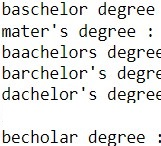


>  <font color = "darkgreen">__Rapidfuzz__(veya başka fuzzywuzzy kütüphaneleri de olabilir), __aramak istenilen kelimeye en yakın Levenshtein mesafesine sahip kelimeyi bulmaya yardımcı olan, nihayetinde benzer kelimeleri belirlenen bir threshold doğrultusunda seçmeyi sağlayan bir kütüphane.__</font>

> <font color = "darkgreen">__Levenshtein Distance__: _" Bilgi teorisi, dilbilim ve bilgisayar bilimlerinde Levenshtein mesafesi, iki dizi arasındaki farkı ölçmek için kullanılan bir dizi ölçüsüdür. Gayri resmi olarak, iki kelime arasındaki Levenshtein mesafesi, bir kelimeyi diğerine değiştirmek için gereken minimum tek karakterli düzenleme sayısıdır. "_</font>

    


***
***
***

In [1]:
!python --version

Python 3.10.6


In [2]:
import pandas as pd
import numpy as np
import warnings

#Rapidfuzz gerekli fonksiyonlar
from rapidfuzz import fuzz,process

# GoogleTranslate'in kendi kütüphanesi lokalimde sorun verdiği için 
# muadili denebilecek deep_translator paketini kullandım
from deep_translator import GoogleTranslator

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
warnings.filterwarnings("ignore")

edu = pd.read_csv("OG_DATA/education.csv")
skills = pd.read_csv('OG_DATA/skills.csv')
lang = pd.read_csv('OG_DATA/languages.csv')
exp = pd.read_csv('OG_DATA/work_experiences.csv')
train = pd.read_csv('OG_DATA/train_users.csv')
test = pd.read_csv('OG_DATA/test_users.csv')

all_users = list(train.user_id.values) + list(test.user_id.values)
edu = edu.loc[all_users]
skills = skills.loc[all_users]
lang = lang.loc[all_users]
exp = exp.loc[all_users]

***
# <font color = "RoyalBlue">Education</font>


#### <font color = "RoyalBlue"> Derece, okul ismi, alan ismi sütunlarını rapidfuzz ile düzenleme</font> 

* __<font color = "darkgreen">Derece sütununda student, high school, associate, bachelor, master, phd kategorileri oluşturmayı hedefledim.</font>__

* __<font color = "darkgreen">Benzer şekilde okul isimleri ve alan isimleri sütunlarında da Türkçe/İngilizce yazılan fakat aynı okulu/alanı belirten stringleri çeviri yaparak ve gerektiğinde yine rapidfuzz kullanarak birleştirmeyi hedefledim.</font>__

* __<font color = "darkgreen">Farklı ratio türleri ve thresholdlar ile denemeler yaptıktan sonra, en düzgün sonuçları veren kombinasyonları belirledim.</font>__

***

In [3]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66274 entries, 1301 to 16036
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           66274 non-null  int64  
 1   school_name       66274 non-null  object 
 2   degree            49674 non-null  object 
 3   fields_of_study   56935 non-null  object 
 4   start_year_month  4019 non-null   float64
 5   end_year_month    3673 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ MB


In [4]:
edu.isna().sum()

user_id                 0
school_name             0
degree              16600
fields_of_study      9339
start_year_month    62255
end_year_month      62601
dtype: int64

***
## <font color = "RoyalBlue">Degree</font>
***

In [5]:
edu_copy = edu.copy()
edu_copy.degree.value_counts().head(20)

Lisans Derecesi                 9218
Bachelor's degree               6641
Yüksek Lisans (Master)          2272
Master's degree                 2096
Lisans                          1397
Master of Science - MS          1021
Bachelor of Science - BS        1003
High School Diploma              823
Lise                             774
Bachelor of Engineering - BE     730
High School                      726
Önlisans                         719
Associate's degree               634
Bachelor's Degree                598
Bachelor of Science (BS)         596
Ön Lisans                        489
Bachelor’s Degree                471
Bachelor of Science (BSc)        389
Doctor of Philosophy - PhD       368
BS                               365
Name: degree, dtype: int64

In [6]:
#karakter ve lowercase dönüşümü
char_table = str.maketrans( "İIıÖöÜüÇçŞşĞğÜü", 
                            "iiioouuccssgguu")

edu_copy.degree = edu_copy.degree.str.translate(char_table).str.lower()

edu_copy.degree.value_counts().head(20)

lisans derecesi                 9221
bachelor's degree               7243
master's degree                 2297
yuksek lisans (master)          2272
lisans                          1525
master of science - ms          1021
bachelor of science - bs        1003
lise                             851
high school diploma              826
onlisans                         817
high school                      759
bachelor of engineering - be     730
associate's degree               674
on lisans                        621
bachelor of science (bs)         596
bachelor’s degree                473
bachelor of science (bsc)        389
bs                               375
doctor of philosophy - phd       368
muhendislik fakultesi mezunu     324
Name: degree, dtype: int64

In [7]:
edu_copy.degree.nunique()

3319

In [8]:
def list_to_dict(list_, string_):
    result_dict = {list_[i]: string_ for i in range(0, len(list_))}
    return result_dict

***
### <font color = "RoyalBlue">Öğrenci</font>
***

In [9]:
extracted_student = []
student_list = []
s = 0   
for i in process.extract_iter('student',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_student.append(i)
    student_list.append(extracted_student[s][0])
    s = s+1
for i in process.extract_iter('ogrenci',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_student.append(i)
    student_list.append(extracted_student[s][0])
    s = s+1
for i in process.extract_iter('ogrencisi',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_student.append(i)
    student_list.append(extracted_student[s][0])
    s = s+1
    
student_df = pd.DataFrame(student_list,columns=['student'])
student_df_list = student_df.student.unique().tolist()
student_dict = list_to_dict(student_df_list,'student')

for key, value in student_dict.items():
    print(key, ':', value)

erasmus student exchange programme : student
student : student
erasmus student exchange : student
senior student : student
student at buiseness faculty  : student
esl english prep class student in newyork/usa : student
high honor student : student
erasmus student : student
special student : student
honored student 2011-2012 gpa : 2.79 : student
msc student : student
exchange student : student
bachelor of science (b.s.) - top scoring student  : student
farabi student exchange program : student
erasmus student exchange program : student
second-best student : student
bachelor's degree eramus student : student
erasmus+ student exchange program : student
undergraduate student : student
fourth grade student  : student
exchange student bachelor's degree : student
bachelor's degree, high honor student : student
bachelor's degree - exchange student : student
prep student : student
middle school - 91/100 - graduated as #1 graded student. : student
erasmus exchange student : student
volunteer pro

***

* <font color = "darkgreen">__Benzer kelimeleri yüksek oranda bulup karşılıkları ile maplemek üzere bir sözlük oluştursak da, arada hatalı çıkarımlar oluyor.__ </font>

* <font color = "darkgreen">__Mecburen elle düzeltmek ve sözlüğü update etmek gerekiyor.__</font>

* <font color = "darkgreen">__Update sonrası oluşan sözlük ile degree sütununu güncelleyip geri kalan verileri sütunun kendisi ile dolduruyoruz.__</font>

***



In [10]:
keys_to_remove = ['top student in the department', 'highest ranked student'
                 ]

keys_to_update = {'honor student / double major, gano: 3.0' : 'bachelor', 'high school, honor student of the school' : 'high school graduate',
                  'farabi exchange student (lisans)' : 'bachelor', 'middle school - 91/100 - graduated as #1 graded student.' : 'high school graduate',
                  'bachelor degree, transfer student ' : 'bachelor', 'bachelor\'s degree - exchange student' : 'bachelor',
                  'bachelor\'s degree, exchange student' : 'bachelor', 'bachelor\'s degree(honour student)' : 'bachelor',
                  'second-best student' : 'high school graduate', 'web engineering international program' : 'master',
                  'high honour student' : 'bachelor', 'bachelor\'s degree, high honor student' : 'bachelor', 
                  'graduate student of information systems engineering(suny)' : 'bachelor', 'top student of 2010-2014 graduates' : 'high school graduate',
                  'high honors student (100/100)' : 'high school graduate', '2012 top scoring student' : 'bachelor',
                  'honor student and 3rd of the department' : 'bachelor', 'graduated as 3rd best student' : 'associate',
                  'graduated as 1st best student' : 'high school graduate', 'bachelor\'s degree , 3,62 , high honour student' : 'bachelor',
                  'bachelor of science (bsc) (3.06 honored student)' : 'bachelor', 'bachelor of science (bsc) (3.16 honored student)' : 'bachelor',
                  'valedictorian, best student' : 'bachelor', 'basarili ogrenci' : 'high school graduate', 
                  'okul 4.lugu ile mezun, %50 burslu ogrenci' : 'high school graduate'

                 }
#sil 
for key in keys_to_remove:
    if key in student_dict:
        del student_dict[key]

#güncelle
student_dict.update(keys_to_update)

#map et
edu_copy.degree = edu_copy.degree.map(student_dict).fillna(edu_copy.degree)

***
### <font color = "royalblue">Master</font>

*  __<font color = "darkgreen">Direkt olarak `yüksek -> yüksek lisans` dönüşümü yapmak `yüksek okul` ve türevi stringleri de bu dönüşüme uğratıyor, bu sebeple öncelikle yüksek lisans kategorisini düzenledim.</font>__
***

In [11]:
extracted_master = []
master_list = []
j = 0

for i in process.extract_iter('master',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_master.append(i)
    master_list.append(extracted_master[j][0])
    j = j+1
for i in process.extract_iter('ms',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_master.append(i)
    master_list.append(extracted_master[j][0])
    j = j+1
for i in process.extract_iter('m.sc',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_master.append(i)
    master_list.append(extracted_master[j][0])
    j = j+1
for i in process.extract_iter('yuksek lisans',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_master.append(i)
    master_list.append(extracted_master[j][0])
    j = j+1
    
master_df = pd.DataFrame(master_list,columns=['master'])
master_df_list = master_df.master.unique().tolist()
master_dict = list_to_dict(master_df_list,'master')

for key, value in master_dict.items():
    print(key, ':', value)

master of science - ms : master
master's degree : master
master of science : master
yuksek lisans (master) : master
master of engineering (m.eng.) : master
master of business administration - mba : master
master’s degree : master
master of science (msc) : master
master : master
master of business administration (m.b.a.) : master
master of engineering - meng : master
master of science (ms) : master
master of science (m.sc.) : master
degree (master) : master
master of arts - ma : master
master's degree (msc) : master
master of science (msc)  : master
master of business administration (mba) : master
master of business administration : master
master’s degree (msc) : master
master of science (m.s.) : master
master's degree (non-thesis) : master
master degree : master
master of science (m.sc.) in electronics engineering : master
master of science - msc : master
master of arts : master
gpa: 4.00/4.00 ,master of business administration (m.b.a.) : master
masters : master
advanced master (m.a.s.

In [12]:
keys_to_update = {'lisans' : 'bachelor', 'on lisans' : 'associate', 'lisans ' : 'bachelor', 'on lisans ' : 'associate',
                  'yuksek onur' : 'bachelor', 'on-lisans' : 'associate', 'lisans; on lisans' : 'bachelor',
                  'yuksek okul' : 'associate', 'lisans (bs)' : 'bachelor', ' on lisans' : 'associate',
                  'lisans(terk)' : 'dropped', 'master (dropped)' : 'dropped'
                 } 

        
        
master_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(master_dict).fillna(edu_copy.degree)

***
### <font color = "royalblue">Phd</font>
***

In [13]:
extracted_phd = []
phd_list = []
k = 0   
for i in process.extract_iter('phd',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_phd.append(i)
    phd_list.append(extracted_phd[k][0])
    k = k+1
for i in process.extract_iter('ph.d',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_phd.append(i)
    phd_list.append(extracted_phd[k][0])
    k = k+1
for i in process.extract_iter('doctor',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_phd.append(i)
    phd_list.append(extracted_phd[k][0])
    k = k+1
for i in process.extract_iter('doktor',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_phd.append(i)
    phd_list.append(extracted_phd[k][0])
    k = k+1
    
phd_df = pd.DataFrame(phd_list,columns=['phd'])
phd_df_list = phd_df.phd.unique().tolist()
phd_dict = list_to_dict(phd_df_list,'phd')

for key, value in phd_dict.items():
    print(key, ':', value)

doctor of philosophy (phd) : phd
doctor of philosophy - phd : phd
phd : phd
phd in computer engineering 3.86/4.00 : phd
ph : phd
doctor of philosophy - phd  : phd
doctor of philosophy - phd(c) : phd
doctor of philosophy - phd (candidate) : phd
doktora (phd) : phd
honorary phd. : phd
doctor of philosophy - phd  (dropout) : phd
phd. : phd
doktora/phd : phd
phd candidate : phd
phd in economics : phd
phd. computer engineering : phd
doctor of philosophy (phd) (candidate) : phd
doctor of philosophy - phd (leave) : phd
doctor of philosophy - phd candidate : phd
phd (not completed) : phd
phd. in analytical chemistry : phd
doctor of philosophy - phd (working) : phd
phd / drop out : phd
doktora ( phd ) : phd
phd.  in computer science and engineering : phd
doctor of computer engineering - phd : phd
doctor of philosophy(phd) : phd
doctor of philosophy (ph.d.) : phd
ph.d. : phd
doctor of philosophy (ph. d.) : phd
ph.d : phd
ph. d : phd
ph. d. -  left at 4th semester : phd
doctor of philosophy (ph.d

In [14]:
keys_to_update = {'phd taught courses' : 'bachelor', 'doctor of medicine (m.d.)' : 'bachelor', 
                  'phd (not completed)' : 'dropped', 'doctor of philosophy - phd  (dropout)' : 'dropped', 
                  'doctor of philosophy - phd (leave)' : 'dropped',
                  'phd (incomplete)' : 'dropped', 'doctor of philosophy (phd) (dropped out)' : 'dropped',
                  'drop out - doctor of philosophy (phd) ' : 'dropped',
                  'doctor of philosophy (ph.d.) (not completed)' : 'dropped', 
                  'ph. d. -  left at 4th semester' : 'dropped',
                  'doctor of philosophy (ph.d.) (not finished)' : 'dropped', 
                  'doctor of philosophy (ph.d.) - abandoned ' : 'dropped',
                  'doctor of philosophy (ph.d.) - dropped out of' : 'dropped'
                  
                 }

phd_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(phd_dict).fillna(edu_copy.degree)

***
### <font color = "royalblue">Ön Lisans</font>

* __<font color = "darkgreen">`Lisans <-> Ön Lisans` benzerliğinden dolayı, hangi ratio türünü seçersek seçelim `lisans` stringine benzer stringleri aradığımızda `ön lisans` ve türevi stringlerin de çıkarılmasına engel olamıyoruz, regex ile sorgulasak da bu ayrımı yapamayacaktık.</font>__

* __<font color = "darkgreen"> Bu sebeple öncelikle `ön lisans` ve türevlerini aratıp düzenlemeliyiz, doğru ratio/threshold seçimi yapınca, çoğunlukla sadece `ön lisans` ve türevi stringleri elde ediyoruz fakat arada kalan `lisans` stringlerini inceleyerek tespit etmek gerekecek, master durumunda yaşanana benzer bir şekilde. </font>__
***

In [15]:
extracted_associate = []
associate_list = []
l = 0   
for i in process.extract_iter('associate',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_associate.append(i)
    associate_list.append(extracted_associate[l][0])
    l = l+1
for i in process.extract_iter('on lisans',edu_copy.degree,scorer=fuzz.ratio,score_cutoff=70):
    extracted_associate.append(i)
    associate_list.append(extracted_associate[l][0])
    l = l+1
for i in process.extract_iter('on',edu_copy.degree,scorer=fuzz.ratio,score_cutoff=70):
    extracted_associate.append(i)
    associate_list.append(extracted_associate[l][0])
    l = l+1

associate_df = pd.DataFrame(associate_list,columns=['associate'])
associate_df_list = associate_df.associate.unique().tolist()
associate_dict = list_to_dict(associate_df_list,'associate')

for key, value in associate_dict.items():
    print(key, ':', value)

associate's degree : associate
associate : associate
associate degree : associate
associate of science - as : associate
cisco certified network associate : associate
associate’s degree : associate
associate degree distance learning : associate
associate degrees : associate
associate of arts - aa : associate
associate of science (a.s.) : associate
associate program : associate
associate of arts and sciences (aas) : associate
associate of arts and sciences - aas : associate
associate of arts and sciences (a.a.s.) : associate
associate of arts (aa) : associate
second, associate degree : associate
associate degree in electrical power systems : associate
associate of science (as) : associate
open-university (associate) : associate
associate	degree  : associate
 associate degree  : associate
associate of arts (a.a.) : associate
associated : associate
associate degree 3.90/4 : associate
associate of science : associate
associate degree  : associate
associate of applied science (ass) : associa

In [16]:
keys_to_update = {'onlisans(terk)' : 'dropped', 'non' : 'bachelor', 'lisan' : 'associate', 'lisanas' : 'associate', 
                  'lisansn' : 'associate', 'linsans' : 'associate'
                 }
associate_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(associate_dict).fillna(edu_copy.degree)

***
### <font color = "royalblue">Lisans</font>
***

In [17]:
extracted_bachelor = []
bachelor_list = []
m = 0
for i in process.extract_iter('bachelor',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('bs',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('ba',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('b.',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('engineer',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('undergraduate',edu_copy.degree,scorer=fuzz.token_set_ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('lisans derecesi',edu_copy.degree,scorer=fuzz.ratio,score_cutoff=70):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
for i in process.extract_iter('lisans',edu_copy.degree,scorer=fuzz.ratio,score_cutoff=85):
    extracted_bachelor.append(i)
    bachelor_list.append(extracted_bachelor[m][0])
    m = m+1
    
bachelor_df = pd.DataFrame(bachelor_list,columns=['bachelor'])
bachelor_df_list = bachelor_df.bachelor.unique().tolist()
bachelor_dict = list_to_dict(bachelor_df_list,'bachelor')

for key, value in bachelor_dict.items():
    print(key, ':', value)

bachelor : bachelor
bachelor's degree : bachelor
bachelor of business administration - bba : bachelor
bachelor of science - bs : bachelor
bachelor of engineering (b.e.) : bachelor
bachelor of engineering (b.eng.) : bachelor
bachelor of science (bs) : bachelor
bachelor of business administration (b.b.a.) : bachelor
bachelor of science (bsc) : bachelor
bachelor’s degree : bachelor
bachelor of econometrics : bachelor
bachelor of applied science - basc : bachelor
bachelor of business administration (bba) : bachelor
bachelor's degree (b.sc.) : bachelor
bachelor of science (b.sc.) : bachelor
bachelor degree : bachelor
bachelor of arts (ba) : bachelor
bachelor of business administration - bba  : bachelor
bachelor of science (b.s.) : bachelor
 bachelor's degree, interior architecture and environmental design : bachelor
bachelor of science - bsc : bachelor
bachelor of engineering - be : bachelor
 bachelor's degree : bachelor
bachelor of science : bachelor
bachelor of arts - ba : bachelor
bachel

In [18]:
keys_to_remove = ['uefa b license', 'beginner']

keys_to_update = {'bachelor\'s degree (left without graduation to study at bilkent university)' : 'dropped',
                  'dropped out, bachelor\'s degree' : 'dropped', 'erasmus / bachelor\'s degree' : 'student',
                  'bachelor\'s degree (erasmus+ program)' : 'student', 'bachelor\'s degree (i did not finish it)' : 'dropped',
                  'bachelor\'s degree - erasmus (6 months)' : 'student', 'bachelor- erasmus-scholarship ' : 'student', 
                  'bachelor of science (bsc) ( transferred to middle east technical university after 1st year)' : 'student',
                  'dba' : 'associate', 'bba' : 'associate', 'mba' : 'master', '81 (ba)' : 'high school graduate', '(mba)' : 'master',
                  't.b.m.y.o' : 'associate', 'lisans derecesi (terk) / undergraduate (dropped)' : 'dropped', 'lisans derecesi(erasmus)' : 'student',
                  'lisans derecesi (erasmus)' : 'student', '3.39/4 – onlisans derecesi' : 'associate', 'on lisans (derece ile)' : 'associate',
                  'lisans derecesi: (terk)' : 'dropped'
                 }

for key in keys_to_remove:
    if key in bachelor_dict:
        del bachelor_dict[key]


bachelor_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(bachelor_dict).fillna(edu_copy.degree)

***
### <font color = "royalblue">Lise</font>
***

In [19]:
extracted_high_school = []
high_school_list = []
n = 0   
for i in process.extract_iter('high school',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1
for i in process.extract_iter('lise',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1
for i in process.extract_iter('yuksek okul',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1  

high_school_df = pd.DataFrame(high_school_list,columns=['high_school'])
high_school_df_list = high_school_df.high_school.unique().tolist()
high_school_dict = list_to_dict(high_school_df_list,'high school graduate')

for key, value in high_school_dict.items():
    print(key, ':', value)

high school diploma : high school graduate
high school : high school graduate
vocational high school : high school graduate
highschool : high school graduate
technical high school : high school graduate
english language school : high school graduate
summer school : high school graduate
high school degree : high school graduate
onlisans (vocational higher school) : high school graduate
winter school : high school graduate
haydarpasa technical high school : high school graduate
high school's degree : high school graduate
school of applied disciplines : high school graduate
high school graduates : high school graduate
the school of foreign languages : high school graduate
primary school : high school graduate
secondary school : high school graduate
vocational school of technical sciences  : high school graduate
vocational school : high school graduate
changed school : high school graduate
preparatory school : high school graduate
school of engineering sciences : high school graduate
langu

In [20]:
keys_to_remove = ['english language school', 'language school' ]

keys_to_update = {'high honor' : 'bachelor'  }


for key in keys_to_remove:
    if key in high_school_dict:
        del high_school_dict[key]


high_school_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(high_school_dict).fillna(edu_copy.degree)

In [21]:
edu_copy.degree.value_counts().head(1000)

bachelor                                                                      25428
master                                                                         9287
high school graduate                                                           2942
associate                                                                      2441
phd                                                                            1019
muhendislik fakultesi mezunu                                                    324
student                                                                         308
muhendislik fakultesi                                                           262
licentiate degree                                                               199
4                                                                               101
3                                                                                96
yuksekokul mezunu                                                           

***
### <font color = "royalblue">Ek arama</font>

* __<font color = "darkgreen">Gereken düzenlemeleri yaptıktan sonra daha görünür hale gelecek diğer hatalı verileri ve gözden kaçanları tespit etmek adına, tekrar unique değerlere göz atıp yeni aramalar yapıyorum.</font>__
***

In [22]:
additional_search = []
additional_search_list = []
n = 0   
for i in process.extract_iter('muhendis',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('muhendislik',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('muhendisligi',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('engineering',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('mezun',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('mezunu',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('degree',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('fakulte',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('fakultesi',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1
for i in process.extract_iter('faculty',edu_copy.degree,scorer=fuzz.token_ratio,score_cutoff=70):
    additional_search.append(i)
    additional_search_list.append(additional_search[n][0])
    n = n+1

additional_df = pd.DataFrame(additional_search_list,columns=['additional'])
additional_df_list = additional_df.additional.unique().tolist()
additional_dict = list_to_dict(additional_df_list,'bachelor')

for key, value in additional_dict.items():
    print(key, ':', value)

muhendis : bachelor
muhendislik : bachelor
uzay muhendisi : bachelor
muhendislik - mimarlik fakultesi : bachelor
muhendislik fakultesi : bachelor
muhendislik fakultesi mezunu : bachelor
mimarlik muhendislik fakultesi : bachelor
muhendislik mimarlik fakultesi : bachelor
mimarlik ve muhendislik fakultesi : bachelor
muhendislik fakultesi  : bachelor
muhendislik ve mimarlik fakultesi : bachelor
muhendislik - teknoloji fakultesi : bachelor
muhendislik fakultesi bolum 2.si : bachelor
muhendislik-mimarlik fakultesi : bachelor
yazilim muhendisi : bachelor
"muhendislik fakultesi" : bachelor
muhendislik ve mimarlik fakultesi mezunu. : bachelor
muhendislik fakultesi bilgisayar muhendisligi : bachelor
muhendislik- mimarlik fakultesi mezunu : bachelor
muhendislik ve mimarlik fakultesi mezunu : bachelor
muhendislik ve doga bilimleri fakultesi mezunu : bachelor
mimarlik-muhendislik fakultesi : bachelor
muhendislik ve doga bilimleri fakultesi : bachelor
muhendislik fakultesi mezunu (3.24 - 4.00) : bac

In [23]:
keys_to_remove = ['data engineering nanodegree', 'mezun', 'yazilim mezunu', 'sertifka programi mezunu', 'advanced degree', 'nanodegree',
                  'fc degree', 'nano degree', 
                  
                 ]

keys_to_update = {'studying computer engineering' : 'student', 'transfer to computer engineering' : 'student', 
                  'mezun degilim' : 'student', 'mezuniyet' : 'high school graduate', '2002 mezun' : 'high school graduate',
                  'mf mezunu' : 'high school graduate', 'anadolu lisesi mezun' : 'high school graduate', 'bilg. bolumu mezun' : 'high school graduate',
                  'birincilik ile mezun oldum.' : 'high school graduate', 'mezunu' : 'high school graduate', 'mezun, iyi' : 'high school graduate',
                  'yuksekokul mezunu' : 'high school graduate', 'tbmyo mezunu' : 'high school graduate', 'myo mezunu' : 'high school graduate',
                  'anadolu meslek lisesi mezunu' : 'high school graduate', 'bilgisayar ve teknoloji yuksekokulu mezunu' : 'high school graduate',
                  'sayisal mezunu' : 'high school graduate', 'fen bilimleri mezunu' : 'high school graduate', 'anadolu lisesi mezunu' : 'high school graduate',
                  'web tasarim ve programlama mezunu' : 'high school graduate', 'fen lisesi mezunu' : 'high school graduate', 'bilgisayar yazilim mezunu'  :'high school graduate',
                  'teknik egitim fakultesi mezunu' : 'associate', 'macka akif tuncel anadolu meslek lisesi mezunu' : 'high school graduate',
                  'sayisal bolum mezunu' : 'high school graduate', 'anadolu lisesi mezunu 75,75 ortalama ile' : 'high scholl graduate',
                  'anadolu lisesi mezunu(ingilizce)' : 'high school graduate', 'ilkogretim okulu mezunu' : 'high school graduate',
                  'turizm ve otel isletmeciligi on lisans mezunu' : 'associate', 'teknik bilimler mezunu' : 'associate',
                  'tunca myo mezunu' : 'high school graduate', 'web tasarim ve programciligi mezunu' : 'high school graduate',
                  'anadolu teknik lisesi mezunu tekniker' : 'high school graduate', 'anadolu ogretmen lisesi mezunu' : 'high school graduate',
                  'veri tabani dali mezunu' : 'high school graduate', 'ayse atil anadolu lisesi mezunu' : 'high school graduate', 
                  'galatasaray lisesi mezunu' : 'high school graduate', 'nigde fen lisesi 2011 mezunu' : 'high school graduate',
                  'anadolu lisesi fen bilimleri mezunu' : 'high school gradute', 'onlisans mezunu' : 'associate', 'meslek yuksekokulu mezunu' : 'associate',
                  'teknik programlar mezunu' : 'associate', 'esit agirlik mezunu' : 'high school graduate', 'fen mezunu' : 'high school graduate',
                  '"fen lisesi mezunu"' : 'high school graduate', 'ticaret meslek lisesi mezunu' : 'high school graduate', 
                  '125.yil mezunu' : 'high school graduate', 'binnaz ridvan ege anadolu lisesi mezunu' : 'high school graduate',
                  'ogretmen lisesi mezunu' : 'high school graduate', 'ortaokul mezunu' : 'high school graduate', '74,88, fen bilimleri mezunu' : 'high school graduate',
                  'sayisal bilimler mezunu' : 'high school graduate', 'sosyal bilimler mezunu' : 'high school graduate', '2009 mezunu' : 'high school graduate',
                  'ilkogretim mezunu' : 'high school graduate', 'fen alan mezunu' : 'high school graduate', 'anadolu lisesi sayisal bolum mezunu' : 'high school graduate',
                  'adnan menderes anadolu lisesi mezunu' : 'high school graduate', 'bilgisayar bolumu' : 'high school graduate',
                  'degree' : 'bachelor', 'tow-year degree 4 / 3.11' : 'associate', 'doctorate degree' : 'phd', 'non-degree' : 'student', 'no degree' : 'student',
                  'two-year degree' : 'associate', 'vocational degree' : 'high school graduate', 'graduated with a first degree' : 'associate',
                  'msc degree' : 'master', 'masters degree (6 months)' : 'master', 'postgraduate degree. msc' : 'master', 'graduated with first degree' : 'associate',
                  '3rd degree' : 'high school graduate', 'non-degree exchange program (erasmus+)' : 'student', 'masters degree' : 'master',
                  '1st degree' : 'high school graduate', '5th degree ' : 'high school graduate', '3' : 'bachelor', '4' : 'bachelor'
                  
                 }


for key in keys_to_remove:
    if key in additional_dict:
        del additional_dict[key]


additional_dict.update(keys_to_update)

edu_copy.degree = edu_copy.degree.map(additional_dict).fillna(edu_copy.degree)
edu_copy.degree.value_counts().head(1000)

bachelor                                                                   27714
master                                                                      9297
high school graduate                                                        3080
associate                                                                   2462
phd                                                                         1021
student                                                                      319
mezun                                                                         61
certificate                                                                   54
bilgisayar programciligi                                                      48
1                                                                             46
erasmus                                                                       45
2                                                                             44
minor                       

In [24]:
finalmap = {'bachelor' : 'bachelor', 'master' : 'master', 'high school graduate' : 'high school',
           'associate' : 'associate', 'phd' : 'phd', 'student' : 'student'}

edu_copy.degree = edu_copy.degree.map(finalmap).fillna('non valid or unknown')
edu_copy.degree.value_counts().head(1000)

bachelor                27714
non valid or unknown    22381
master                   9297
high school              3080
associate                2462
phd                      1021
student                   319
Name: degree, dtype: int64

__<font color = "royalblue">Böylelikle degree sütununda kategorilerin birbirine karışmasını engelledik, ayrıca regex ile yakalayamayacağımız düzeyde hatalı veri tespiti ve dönüşümü yaptık.</font>__

***
## <font color = "royalblue">School Name</font>

* __<font color = "darkgreen">Rapidfuzz kullanımı benzer şekilde gerçekleşecek.</font>__

* __<font color = "darkgreen">Burada sorun typolardan ziyade farklı dillerde okul isimlerinin girilmiş olması, tüm okul isimlerinin olduğu bir dış veriden sadece TR üniversitelerini alacağım ve her okul ismini hem İngilizce hem Türkçe aratacağım.</font>__
***

In [25]:
edu_copy.drop(columns=['start_year_month','end_year_month'],axis=1,inplace=True)

edu_copy.school_name.nunique()

6700

In [26]:
edu_copy.school_name.value_counts().head(10)

İstanbul Üniversitesi               4069
Anadolu Üniversitesi                2940
İstanbul Teknik Üniversitesi        2736
Istanbul Technical University       2641
Bahçeşehir Üniversitesi             2146
Marmara Üniversitesi                2010
Istanbul University                 1857
Beykent Üniversitesi                1589
Karadeniz Teknik Üniversitesi       1493
Eskişehir Osmangazi Üniversitesi    1471
Name: school_name, dtype: int64

In [27]:
#sadece university_name ve country code yeterli

world_unis = pd.read_csv("EXTERNAL_DATA/world-universities.csv",names=['Country_Code','University_Name'],
                 usecols=['Country_Code','University_Name'])

TR_unis = world_unis.loc[world_unis.Country_Code == 'TR']
TR_unis.head()

,Country_Code,University_Name
6813,TR,Abant Izzet Baysal University
6814,TR,Adnan Menderes University
6815,TR,Afyon Kocatepe University
6816,TR,Ahi Evran University
6817,TR,Akdeniz University


In [28]:
tr_unis_eng = list(TR_unis.University_Name.unique())

tr_unis_tr = []
translator = GoogleTranslator(source='english',target='tr')
for i in range (len(tr_unis_eng)):
    tr_unis_tr.append(translator.translate(tr_unis_eng[i]))

print(len(tr_unis_eng),len(tr_unis_tr))

92 92


***
### <font color = "royalblue">Üniversite</font>
***


In [29]:
# ingilizce arama

whole_school_dict_eng = {}
for item in range(len(tr_unis_eng)):
    
    extracted_school = []
    school_list = []
    j = 0

    for i in process.extract_iter(tr_unis_eng[item],edu_copy.school_name,scorer=fuzz.token_set_ratio,score_cutoff=90):
        extracted_school.append(i)
        school_list.append(extracted_school[j][0])
        j = j+1
    for i in process.extract_iter(str.split(tr_unis_eng[item],sep=' ')[0],edu_copy.school_name,scorer=fuzz.token_sort_ratio,score_cutoff=90):
        extracted_school.append(i)
        school_list.append(extracted_school[j][0])
        j = j+1
    school_df = pd.DataFrame(school_list,columns=['school'])
    school_df_list = school_df.school.unique().tolist()
    school_dict = list_to_dict(school_df_list,tr_unis_eng[item])
    whole_school_dict_eng.update(school_dict)

#türkçe arama

whole_school_dict_tr = {}
for item in range(len(tr_unis_tr)):
    
    extracted_school = []
    school_list = []
    j = 0

    for i in process.extract_iter(tr_unis_tr[item],edu_copy.school_name,scorer=fuzz.token_set_ratio,score_cutoff=90):
        extracted_school.append(i)
        school_list.append(extracted_school[j][0])
        j = j+1
    for i in process.extract_iter(str.split(tr_unis_tr[item],sep=' ')[0],edu_copy.school_name,scorer=fuzz.token_sort_ratio,score_cutoff=90):
        extracted_school.append(i)
        school_list.append(extracted_school[j][0])
        j = j+1
    school_df = pd.DataFrame(school_list,columns=['school'])
    school_df_list = school_df.school.unique().tolist()
    school_dict = list_to_dict(school_df_list,tr_unis_eng[item])
    whole_school_dict_tr.update(school_dict)
    
whole_school_dict_eng.update(whole_school_dict_tr)

for key, value in whole_school_dict_eng.items():
    print(key, ':', value)

Abant İzzet Baysal Üniversitesi : Abant Izzet Baysal University
Abant İzzet Baysal University : Abant Izzet Baysal University
Abant İzzet Baysal Üniversitesi / Abant Izzet Baysal University : Abant Izzet Baysal University
Abant Izzet Baysal University : Abant Izzet Baysal University
Adnan Menderes University : Adnan Menderes University
Adnan Menderes : Adnan Menderes University
Afyonkocatepe University : Afyon Kocatepe University
Afyon Kocatepe University : Afyon Kocatepe University
AFYONKOCATEPE UNIVERSITY : Afyon Kocatepe University
Ahi Evran University : Ahi Evran University
Doğu Akdeniz Üniversitesi / Eastern Mediterranean University : Akdeniz University
Akdeniz University : Akdeniz University
Anadolu University : Anadolu University
Anadolu Unıversity : Anadolu University
Anadolu : Anadolu University
Eskişehir Anadolu University  : Anadolu University
Anadolu Üniversitesi / Anatolian University : Anadolu University
Eskisehir Anadolu University : Anadolu University
Anadolu University

In [30]:
keys_to_remove = ['University',  'university',  
                  'Ankara University Development Foundation Primary School', 
                  'Ankara University Development Foundation Private Anatolian High School',
                 'Ankara university', 'Bahcesehir University, Istanbul', 
                  'University of Bahcesehir, Istanbul', 'Frat University', 'ISRA University', 
                  'Istanbul Arel University', 'Istanbul Bilgi University',
                 'İstanbul Bilgi University','ISTANBUL BILGI UNIVERSITY', 'Istanbul Technical University',
                 'İstanbul Teknik Üniversitesi / Istanbul Technical University', 'İstanbul Technical University',
                 'Faculty of Electronical and Communication Engineering, Istanbul Technical University', 
                  'Istanbul Technical University, Institue of Science and Technology',
                 'University (Postgraduate Degree) Istanbul Technical University', 'İstanbul Technical University ', 
                  'Istanbul Technical University, Istanbul', 'Technical University of Istanbul', 
                  'ISTANBUL TECHNICAL UNIVERSITY', 'Istanbul Technic University', 
                  'Istanbul Technical University (ITU)', 'İSTANBUL TECHNICAL UNIVERSITY', 'Istanbul Technical University ',
                  ' Istanbul Technical University', 'ISTANBUL TECHNICAL UNIVERSITY -ISTANBUL', 
                  'Istanbul Technical University, Faculty of Mechanical Engineering',
                  'Istanbul Technical University, Computer Engineering', 'Mugla Sitki Kocman University', 
                  'Mugla Sıtkı Kocman University',
                  'mugla sitki kocman university', 'Budapest University of Technology and Economics', 
                  'University of Technology and Economics',
                  'Doğu Akdeniz Üniversitesi', 'Adana Özel Yeni Lise, Doğu Akdeniz Üniversitesi', 
                  'Gazi Üniversitesi Vakfı Özel Anadolu Lisesi',
                  'Çankaya Üniversitesi', 'ANKARA ÜNİVERSİTESİ', 'Ankara Üniversitesi ', 'Başkent Üniversitesi', 
                  'Beykent Üniversitesi',
                  'Baskent Üniversitesi', 'İstanbul Beykent Üniversitesi Yönetim Bilşim Sistemleri Y.Lisans (MIS) Tezli', 
                  'İstanbul Beykent Üniversitesi',
                  'GYTE Yüksek Teknoloji Enstitüsü', 'İstanbul Teknik Üniversitesi', 'İstanbul Teknik Üniversitesi ', 
                  'İstanbul Teknik Üniversitesi / Bilgisayar Mühendisliği', 
                  'İstanbul Teknik Üniversitesi Meslek Yüksekokulu Elektronik Ve Haberleşme Mühendisliği Bölümü', 
                  'Muğla Sıtkı Koçman Üniversitesi'
                  ]

items_to_update = {'İ.University' : 'Istanbul University',  
                   'Doğu Akdeniz Üniversitesi / Eastern Mediterranean University':'Dogu Akdeniz University',
                 'Ankara University' : 'Ankara University', 'Ankara Yıldırım Beyazıt University' : 'Yildirim Beyazit University',
                   'Ankara' : 'Ankara University',
                 'University of Ankara' : 'Ankara University', 'Ankara university' : 'Ankara University' , 
                   'Bahcesehir University, Istanbul' : 'Bahcesehir University',
                   'University of Bahcesehir, Istanbul' : 'Bahcesehir University',
                 'Frat University' : 'Firat (Euphrates) University', 'Istanbul Arel University' : 'Istanbul Arel University', 
                   'Istanbul Bilgi University':'Istanbul Bilgi University',
                 'İstanbul Bilgi University' : 'Istanbul Bilgi University','ISTANBUL BILGI UNIVERSITY': 'Istanbul Bilgi University', 
                   'Istanbul Technical University' : 'Istanbul Technical University',
                 'İstanbul Teknik Üniversitesi / Istanbul Technical University' : 'Istanbul Technical University', 
                   'İstanbul Technical University' : 'Istanbul Technical University',
                 'Faculty of Electronical and Communication Engineering, Istanbul Technical University' : 'Istanbul Technical University',
                   'Istanbul Technical University, Institue of Science and Technology' : 'Istanbul Technical University',
                 'University (Postgraduate Degree) Istanbul Technical University' : 'Istanbul Technical University', 
                   'İstanbul Technical University ' : 'Istanbul Technical University', 
                   'Istanbul Technical University, Istanbul' : 'Istanbul Technical University',
                 'Technical University of Istanbul' : 'Istanbul Technical University', 
                   'ISTANBUL TECHNICAL UNIVERSITY' : 'Istanbul Technical University',
                   'Istanbul Technic University' : 'Istanbul Technical University', 
                  'Istanbul Technical University (ITU)' : 'Istanbul Technical University', 
                   'İSTANBUL TECHNICAL UNIVERSITY': 'Istanbul Technical University',
                   'Istanbul Technical University ' : 'Istanbul Technical University',
                  ' Istanbul Technical University' : 'Istanbul Technical University', 
                   'ISTANBUL TECHNICAL UNIVERSITY -ISTANBUL' : 'Istanbul Technical University', 
                   'Istanbul Technical University, Faculty of Mechanical Engineering' : 'Istanbul Technical University',
                  'Istanbul Technical University, Computer Engineering' : 'Istanbul Technical University', 
                   'Mugla Sitki Kocman University' : 'Mugla Sitki Kocman University', 
                   'Mugla Sıtkı Kocman University' : 'Mugla Sitki Kocman University',
                  'mugla sitki kocman university' : 'Mugla Sitki Kocman University', 
                  'Doğu Akdeniz Üniversitesi' : 'Dogu Akdeniz University', 
                   'Adana Özel Yeni Lise, Doğu Akdeniz Üniversitesi' : 'Dogu Akdeniz University',
                  'Çankaya Üniversitesi' : 'Cankaya University', 'ANKARA ÜNİVERSİTESİ' : 'Ankara University', 
                   'Ankara Üniversitesi ' : 'Ankara University', 'Başkent Üniversitesi' : 'Baskent University', 
                   'Beykent Üniversitesi' : 'Beykent University',
                  'Baskent Üniversitesi' : 'Baskent University', 
                   'İstanbul Beykent Üniversitesi Yönetim Bilşim Sistemleri Y.Lisans (MIS) Tezli' : 'Beykent University', 
                   'İstanbul Beykent Üniversitesi' : 'Beykent University',
                  'GYTE Yüksek Teknoloji Enstitüsü' : 'Gebze Institute of Technology', 
                   'İstanbul Teknik Üniversitesi' : 'Istanbul Technical University', 
                   'İstanbul Teknik Üniversitesi ' : 'Istanbul Technical University',
                   'İstanbul Teknik Üniversitesi / Bilgisayar Mühendisliği' : 'Istanbul Technical University', 
                  'İstanbul Teknik Üniversitesi Meslek Yüksekokulu Elektronik Ve Haberleşme Mühendisliği Bölümü' : 'Istanbul Technical University', 
                   'Muğla Sıtkı Koçman Üniversitesi':'Mugla Sitki Kocman University', 
                   'İstanbul Ticaret Üniversitesi': 'Istanbul Ticaret University',
                   'İstanbul Arel Üniversitesi': 'Istanbul Arel University', 
                   'İstanbul Bilgi Üniversitesi': 'Istanbul Bilgi University',
                   'İstanbul Bilgi Üniversitesi - Laureate International Universities' : 'Istanbul Bilgi University',
                   'Istanbul Bilgi Üniversitesi': 'Istanbul Bilgi University', 
                   'İstanbul Bilgi Üniversitesi, Tasarim Kulturu ve Yonetimi' : 'Istanbul Bilgi University',
                   'İstanbul Kültür Üniversitesi': 'Istanbul Kultur University', 
                   'Istanbul Kültür Üniversitesi': 'Istanbul Kültür University',
                  }

for key in keys_to_remove:
    if key in whole_school_dict_eng:
        del whole_school_dict_eng[key]
        
        
whole_school_dict_eng.update(items_to_update)

***
### <font color = "royalblue">Lise/Yüksek Okul</font>
***

In [31]:
extracted_high_school = []
high_school_list = []
n = 0   
for i in process.extract_iter('high school',edu_copy.school_name,scorer=fuzz.partial_ratio,score_cutoff=80):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1
for i in process.extract_iter('lise',edu_copy.school_name,scorer=fuzz.partial_ratio,score_cutoff=80):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1
for i in process.extract_iter('yüksek okul',edu_copy.school_name,scorer=fuzz.partial_ratio,score_cutoff=80):
    extracted_high_school.append(i)
    high_school_list.append(extracted_high_school[n][0])
    n = n+1  

high_school_df = pd.DataFrame(high_school_list,columns=['high_school'])
high_school_df_list = high_school_df.high_school.unique().tolist()
high_school_dict = list_to_dict(high_school_df_list,'High School')
whole_school_dict_eng.update(high_school_dict) 


edu_copy.school_name = edu_copy.school_name.map(whole_school_dict_eng).fillna(edu_copy.school_name) 

***
### <font color = "royalblue">Ek arama</font>

* <font color = "darkgreen">__Düzenleme sonrası açığa çıkacak yeni hatalı verileri yakalama ve gözden kaçan hataları düzeltmek için, tekrar arama yapacağım. Zaten düzelttiğimiz okul isimlerinde değişiklik olmayacağı için, en sık karşılaşılan 300 veriyi alıyorum ve ingilizce karşılığıyla map etmek üzere sözlük oluşturuyorum, bu esnada hataları tespit edip elle düzenliyorum.__</font>
***

In [32]:
first_300 = list(edu_copy.school_name.value_counts().head(300).index)

def list_to_dict_2(list_):
    translator = GoogleTranslator(source='auto', target='english')
    result_dict = {list_[i]: translator.translate(list_[i]) for i in range(0, len(list_))}
    return result_dict

first_300_map = list_to_dict_2(first_300)
first_300_map

{'High School': 'High School',
 'Istanbul University': 'Istanbul University',
 'Istanbul Technical University': 'Istanbul Technical University',
 'Anadolu University': 'Anadolu University',
 'Bahcesehir University': 'Bahcesehir University',
 'Marmara University': 'Marmara University',
 'Bilkent University': 'Bilkent University',
 'Beykent University': 'Beykent University',
 'Karadeniz Technical University': 'Karadeniz Technical University',
 'Trakya University': 'Trakya University',
 'Firat (Euphrates) University': 'Firat (Euphrates) University',
 'Osmangazi University': 'Osmangazi University',
 'Dokuz Eylül University': 'Dokuz Eylul University',
 'Cukurova University': 'Cukurova University',
 'Erciyes University': 'Erciyes University',
 'Yeditepe University': 'Yeditepe University',
 'Izmir Institute of Technology': 'Izmir Institute of Technology',
 'Yildiz Technical University': 'Yildiz Technical University',
 'Koc University': 'Koc University',
 'Gebze Teknik Üniversitesi': 'Gebze Te

In [33]:
keys_to_remove= ['Udacity', 'Bilge Adam', 'Cisco Networking Academy', 'İstanbul İşletme Enstitüsü', 'Free Code Camp',
            'Bilge Adam Bilgi Teknolojileri Akademisi', 'EC English Language Centres', 'freeCodeCamp', 'Harvard Business School',
            'Bilge Adam Akademi', 'Üniversitelerarası Kurul Başkanlığı', 'Callan School of London', 'Zero To Mastery Academy',
            'Microverse','BilgeAdam'," C and System Programmers' Association", 'Evde yatma', '--', 'Remote-how, Inc.',
                 'Ministry of National Defense', 'İSMEK',
           ]

keys_to_update = {'Gazi University Ankara': 'Gazi University', 'Firat (Euphrates) University': 'Firat University',
           'Gebze Institute of Technology': 'Gebze Technical University','TED Ankara Koleji': 'High School',
           'Celal Bayar University': 'Celal Bayar University','Istanbul Ticaret University': 'Istanbul Ticaret University',
             'Ondokuz Mayis University Samsun': 'Ondokuz Mayis University', 'Eskişehir Technical University': 'Eskisehir Technical University',
             'Istanbul Kultur University': 'Istanbul Kultur University', 'Cumhuriyet (Republik) University': 'Cumhuriyet University',
             'Robert College' : 'High School', 'Emlak Bankası' : 'High School', 'cakabey okulları' : 'High School',
             'Bosphorus University': 'Bogazici University', 'Doğa Okulları' : 'High School', 'İzmir Özel Türk Koleji' : 'High School',
             'Technische Universität Wien': 'Technical University of Vienna','Private Bilfen Bahçeşehir Primary School' : 'High School',
             'BAAL' : 'High School', 'Akhmet Yassawi University': 'Ahmet Yesevi University', 'TED Ankara College': 'High School',
             'ODTÜ Geliştirme Vakfı Okulları' : 'High School', 'Near East University (NEU)': 'Near East University', 
             'Kara Harp Okulu': 'Turkish Military Academy', 'Çorlu Bahçeşehir College': 'High School', 'Anatolian University': 'Anadolu University',
             'Ted Ankara Koleji' : 'High School', 'Bahçeşehir Koleji' : 'High School', 'Lycee Saint Joseph' : 'High School',
             'TED Kayseri Koleji' : 'High School', 'Bilkent Erzurum Laboratory School' : 'High School', 'Anatolia University': 'Anadolu University',
             'Darüşşafaka Eğitim Kurumları' :'High School', 'University of Oslo (UiO)': 'University of Oslo',
             'Columbia University in the City of New York': 'Columbia University', 'Macka Akif Tuncel Industrial Technical Schools' : 'High School',
             'Canakkale (18th March) University': 'Canakkale OnSekiz Mart University', 'The Koç School' : 'High School',
             'University of Turkish Aeronautical Association': 'Turkish Aeronautical Association University',
             'Manisa Gazi İlkokulu' : 'High School', 'Manisa Şehitler Orta Okulu' : 'High School', 
             'Kahramanmaraş Sütçüimam Üniversitesi': 'Kahramanmaras Sutcu Imam University', 'Nigde University': 'Nigde University',
             'ITU': 'Istanbul Technical University', 'International Baccalaureate' : 'High School', 'İsmail Erez Orta Okulu' : 'High School',
              'İsmail Erez İ.Ö.O': 'High School',  'International Kazakh-Turkish University named after H.A. Yesevi' : 'Ahmet Yesevi University'
             
          }


for key in keys_to_remove:
    if key in first_300_map:
        del first_300_map[key]


first_300_map.update(keys_to_update)

edu_copy.school_name = edu_copy.school_name.map(whole_school_dict_eng).fillna('non valid or other')

edu_copy.school_name.value_counts().head(50)

non valid or other                  12229
High School                          8233
Istanbul University                  6664
Istanbul Technical University        5548
Anadolu University                   3624
Bahcesehir University                3064
Marmara University                   2812
Bilkent University                   2557
Beykent University                   2001
Karadeniz Technical University       1876
Trakya University                    1676
Osmangazi University                 1556
Dokuz Eylül University               1526
Cukurova University                  1354
Yeditepe University                  1322
Erciyes University                   1322
Izmir Institute of Technology        1167
Yildiz Technical University           917
Koc University                        802
Sakarya University                    701
Middle East Technical University      619
Mugla Sitki Kocman University         474
Kocaeli University                    388
Ege University                    

__<font color = "royalblue">Yine benzer şekilde her bir veriyi kendi kategorisinde toplamış olduk, tespit edilemeyecek kadar sıklığı az olan verileri de 'geçersiz veya diğer' olarak kodladık.</font>__

***
## <font color = "royalblue">Fields of Study</font>

* __<font color = "darkgreen"> Buradaki verileri kendi kategorisinde toplamaya yarayacak herhangi bir dış veri bulamadım, o sebeple en sık karşılaşılan ilk 300 alan ismini alacağım ve benzer yöntemleri kullanacağım.</font>__
***


In [34]:
edu_copy.fields_of_study = edu_copy.fields_of_study.str.translate(char_table).str.lower()
edu_copy.fields_of_study.value_counts().head(50)

bilgisayar muhendisligi                                   6715
computer engineering                                      5965
elektrik ve elektronik muhendisligi                       1591
computer science                                          1540
electrical and electronics engineering                    1519
bilgisayar programlama                                     812
yonetim bilisim sistemleri                                 795
computer programming                                       742
isletme                                                    659
yazilim muhendisligi                                       558
mechanical engineering                                     550
isletme ve yonetim, genel                                  535
software engineering                                       525
business administration and management, general            510
bilgisayar yazilimi muhendisligi                           505
industrial engineering                                 

In [35]:
fos_mixed = list(edu_copy.fields_of_study.value_counts().head(300).index)

translator = GoogleTranslator(source='tr', target='english')
def list_to_dict_2(list_):
    result_dict = {list_[i]: translator.translate(list_[i]) for i in range(0, len(list_))}
    return result_dict

map_tr_to_eng = list_to_dict_2(fos_mixed)
map_tr_to_eng

{'bilgisayar muhendisligi': 'computer engineering',
 'computer engineering': 'computer engineering',
 'elektrik ve elektronik muhendisligi': 'electrical and electronics engineering',
 'computer science': 'computer science',
 'electrical and electronics engineering': 'electrical and electronics engineering',
 'bilgisayar programlama': 'computer programming',
 'yonetim bilisim sistemleri': 'management information systems',
 'computer programming': 'computer programming',
 'isletme': 'business',
 'yazilim muhendisligi': 'software engineering',
 'mechanical engineering': 'mechanical engineering',
 'isletme ve yonetim, genel': 'business and management, general',
 'software engineering': 'software engineering',
 'business administration and management, general': 'business administration and management, general',
 'bilgisayar yazilimi muhendisligi': 'computer software engineering',
 'industrial engineering': 'industrial engineering',
 'management information systems': 'management information 

In [36]:
keys_to_remove = [ '[]', '-', 'high school', 'high school/secondary diplomas and certificates', 'ikinci veya yabanci dil olarak ingilizce öğretimi/esl dil egitmeni',
                  'ogrenci'
                ]

keys_to_update = { 'isletme ve yonetim, genel' : 'business and management', 
                  'business administration and management, general' : 'business administration and management',
                  'makine muhendisligi': 'mechanical engineering', 'mathematics': 'maths', 'matematik': 'maths',
                  'turkce-matematik': 'maths',
                  'bilgisayar programlama/programci, genel': 'computer programming', 
                  'computer software engineering': 'software engineering',
                  'bilgisayar yazilimi muhendisligi': 'software engineering',
                  'maths engineering': 'mathematical engineering',
                  'math engineering': 'mathematical engineering',
                  'mathematics engineering': 'mathematical engineering',
                  'management information systems, general': 'management information systems',
                  'management information': 'management information systems',
                  'management information system': 'management information systems',
                  'master of business administration' : 'mba',
                  'yonetim bilgi sistemleri, genel': 'management information systems',
                  'computer science and engineering': 'computer science',
                  'electronics and communications engineering': 'electrical, electronics and communications engineering',
                  'electronics and communication engineering': 'electrical, electronics and communications engineering',
                  'electronic and communication engineering': 'electrical, electronics and communications engineering',
                  'elektrik, elektronik ve iletisim muhendisligi': 'electrical, electronics and communications engineering',
                  'electrical, electronic and communications engineering technology/technician': 'electrical, electronics and communications engineering',
                  'electrical, electronics and communication engineering technologies/technician' :'electrical, electronics and communications engineering',
                  'kimya muhendisligi': 'chemical engineering', 'kimya' : 'chemistry', 'chemical' : 'chemistry',
                  'computer engineer': 'computer engineering', 'fizik': 'physics', 'physical': 'physics',
                  'insaat muhendisligi': 'civil engineering', 'elektronik muhendisligi': 'electronic engineering',
                  'mekatronik muhendisligi': 'mechatronic engineering', 'cybersecurity' : 'cyber security',
                  'gida muhendisligi': 'food engineering', 'bilgisayar programlama, ozel uygulamalar': 'computer programming',
                  'metalurji ve malzeme muhendisligi': 'metallurgy and materials engineering', 'bilgi teknolojisi': 'information technology',
                  'web tasarimi ve kodlama': 'web design', 'web design and coding' : 'web design', 
                  'computer programming/programmer, general': 'computer programming',
                  'computer programmer': 'computer programming',
                  'electrical & electronics engineering': 'electrical and electronics engineering',
                  'electrical-electronics engineering': 'electrical and electronics engineering',
                  'elektrik': 'electrical and electronics engineering',
                  'electrical electronics engineering': 'electrical and electronics engineering',
                  'elektrik elektronik muhendisligi': 'electrical and electronics engineering',
                  'elektrik-elektronik muhendisligi': 'electrical and electronics engineering',
                  'bilgisayar': 'computer science', 'ticaret/isletme, genel': 'business', 
                  'uluslararası iliskiler ve meseleler': 'international relations', 'mechatronics': 'mechatronics engineering',
                  'makine': 'machine engineering', 'computer technology/computer systems technology': 'computer technology',
                  'computer systems' : 'computer technology', 'i̇ş sağlığı ve güvenliği': 'occupational health and safety',
                  'harita muhendisligi': 'map engineering', 'english language and literature, general': 'english language and literature',
                  'bilgisayar yazilimi teknolojisi/teknisyen': 'computer software', 'muhendislik/endustriyel yonetim': 'industrial engineering',
                  'business administration and management': 'business administration', 'business management' : 'business administration',
                  'jeoloji/jeofizik muhendisligi': 'geology engineering', 'geophysics engineering' : 'geology engineering', 
                  'geophysics' : 'geology engineering', 'geology' : 'geology engineering', 
                  'biyomedikal/medikal muhendislik': 'biomedical engineering', 'biomedical' : 'biomedical engineering',
                  'fizik muhendisligi': 'physics engineering', 'biyoloji, genel': 'biology',
                  'master of business administration (mba)': 'mba', 'sciences': 'science', 'mekatronik': 'mechatronics engineering',
                  'web design and programming': 'web design', 'muhendislik fizigi/uygulamali fizik': 'engineering physics',
                  'applied physics' : 'engineering physics', 'biology, general': 'biology',
                  'isletme, yonetim, pazarlama ve ilgili destek hizmetleri' : 'business', 'biomedical/medical engineering': 'biomedical engineering',
                  'chemical engineer': 'chemical engineering', 'bilgisayar ve bilgi teknolojisi, genel': 'computer and information technology',
                  'computer/information technology administration and management': 'computer and information technology',
                  'isletme fakultesi': 'business', 'computer': 'computer engineering', 'ziraat muhendisligi': 'agriculture engineering',
                  'web tasarım': 'web design', 'is sagligi ve guvenligi teknolojisi/teknisyen': 'occupational health and safety',
                  'computer engineering (english)': 'computer engineering',
                  'english language and literature/letters': 'english language and literature', 'bilgisayar muhendisi': 'computer engineering',
                  'turk dili ve edebiyati': 'turkish language and literature', 
                  'biology/biological sciences, general': 'biology', 'makine muhendisligi/makine teknolojisi/teknisyen': 'machine engineering',
                  'biyomuhendislik ve biyomedikal muhendislik': 'biomedical engineering', 'bilgisayar muhendisligi yuksek lisans': "computer engineering"
    
                 }


for key in keys_to_remove:
    if key in map_tr_to_eng:
        del map_tr_to_eng[key]
        
map_tr_to_eng.update(keys_to_update)


edu_copy.fields_of_study = edu_copy.fields_of_study.map(map_tr_to_eng).fillna('non valid or unknown')

In [37]:
edu_copy.fields_of_study.value_counts().head(300)

non valid or unknown                                             23370
computer engineering                                             12939
electrical and electronics engineering                            3293
computer programming                                              2445
software engineering                                              1986
computer science                                                  1946
management information systems                                    1746
mechanical engineering                                             900
industrial engineering                                             873
business                                                           827
science                                                            792
maths                                                              723
electrical, electronics and communications engineering             573
business and management                                            535
busine

In [38]:
edu = edu_copy
edu

,user_id,school_name,degree,fields_of_study
1301,761,non valid or other,bachelor,computer science
6950,3597,Karadeniz Technical University,bachelor,non valid or unknown
4880,2538,Beykent University,bachelor,"electrical, electronics and communications eng..."
26046,12138,High School,high school,non valid or unknown
11005,5636,Celal Bayar University,associate,computer programming
...,...,...,...,...
32847,15590,Dokuz Eylül University,bachelor,economy
20054,9660,non valid or other,bachelor,software engineering
7029,3642,Karadeniz Technical University,non valid or unknown,software engineering
56130,26205,Yeditepe University,bachelor,industrial engineering


__<font color = "royalblue">Education tablosundaki sütunları yüksek oranda düzenlemiş/temizlemiş, bu esnada kategorilerin birbirine karışmasını önlemiş olduk. Böylece her bir farklı değerin hedef değişkene olan etkisini hemen hemen koruduğumuzu düşünüyorum.</font>__ <font color = "darkgreen">(Örneğin `lisans` ve `ön lisans` mezunlarını genel olarak bir `mezun`kategorisine toplamaktansa ayrı ayrı bölebildik.)</font>



***
# <font color = "royalblue">Skills</font>

* __<font color = "darkgreen">Kardinalitesi çok yüksek bir sütun, çok fazla sayıda eşsiz değer var.</font>__

* __<font color = "darkgreen">Burada typo sorunu bulunmamakta fakat neredeyse her bir yeteneğin hem Türkçe hem İngilizcesi bulunmakta. Çeviri kullanarak benzer yollar izlenecek.</font>__

* __<font color = "darkgreen">Yine herhangi bir dış veri bulamadığım için, en sık görülen ilk 500 yeteneği İngilizce karşılığı ile eşleyerek yüksek oranda değeri tek bir değerde birleştirmiş olacağım.</font>__
***


In [39]:
skills_common500 = list(skills.skill.value_counts().head(500).index)
skills_common500

['JavaScript',
 'C#',
 'SQL',
 'Java',
 'CSS',
 'HTML',
 'Microsoft SQL Server',
 'MySQL',
 'Git',
 'Yazılım Geliştirme',
 'HTML5',
 'jQuery',
 'ASP.NET',
 'Python',
 'Microsoft Office',
 'ASP.NET MVC',
 'OOP (Nesne Yönelimli Programlama)',
 'PHP',
 '.NET',
 'Linux',
 'C++',
 'JSON',
 'Android',
 'XML',
 'Visual Studio',
 'Software Development',
 'Scrum',
 'C',
 'Web Geliştirme',
 'React.js',
 'JIRA',
 'Proje Yönetimi',
 'İngilizce',
 'Photoshop',
 'AJAX',
 'T-SQL',
 'PostgreSQL',
 'Entity Framework',
 'Spring Framework',
 'PL/SQL',
 'Microsoft Excel',
 'Web Services',
 'Programlama',
 'Bootstrap',
 'MongoDB',
 'Docker',
 'SOAP',
 'Ekip Çalışması',
 'Mühendislik',
 'Web Development',
 'Agile Metotları',
 'Hibernate',
 'Android Uygulama Geliştirme',
 'LINQ',
 'Matlab',
 'TFS',
 'OOP',
 'Node.js',
 'Araştırma',
 'WordPress',
 'Agile Methodologies',
 'Maven',
 'Project Management',
 'Yönetim',
 'Liderlik',
 'Veri Analizi',
 'Web Uygulamaları',
 'Angular',
 'Mobil Uygulamalar',
 'Redis',
 

In [40]:
def list_to_dict_2(list_):
    translator = GoogleTranslator(source='tr', target='english')
    result_dict = {list_[i]: translator.translate(list_[i]) for i in range(0, len(list_))}
    return result_dict

map_skills = list_to_dict_2(skills_common500)
map_skills

{'JavaScript': 'JavaScript',
 'C#': 'C#',
 'SQL': 'SQL',
 'Java': 'Java',
 'CSS': 'CSS',
 'HTML': 'HTML',
 'Microsoft SQL Server': 'Microsoft SQL Server',
 'MySQL': 'MySQL',
 'Git': 'Go',
 'Yazılım Geliştirme': 'Software development',
 'HTML5': 'HTML5',
 'jQuery': 'jQuery',
 'ASP.NET': 'ASP.NET',
 'Python': 'Python',
 'Microsoft Office': 'Microsoft Office',
 'ASP.NET MVC': 'ASP.NET MVC',
 'OOP (Nesne Yönelimli Programlama)': 'OOP (Object Oriented Programming)',
 'PHP': 'PHP',
 '.NET': '.NET',
 'Linux': 'Linux',
 'C++': 'C++',
 'JSON': 'JSON',
 'Android': 'Android',
 'XML': 'XML',
 'Visual Studio': 'Visual Studio',
 'Software Development': 'Software Development',
 'Scrum': 'scrum',
 'C': 'C',
 'Web Geliştirme': 'Web Development',
 'React.js': 'React.js',
 'JIRA': 'JIRA',
 'Proje Yönetimi': 'Project management',
 'İngilizce': 'English',
 'Photoshop': 'Photoshop',
 'AJAX': 'AJAX',
 'T-SQL': 'T-SQL',
 'PostgreSQL': 'PostgreSQL',
 'Entity Framework': 'Entity Framework',
 'Spring Framework':

In [41]:
keys_to_remove = [ 'Git', 'Matlab', 'Scrum', 'Programming', 'Routers', 'Maven', 'Teamwork', 'Engineering',
                  'Databases', 'Research', 'Redis', 'Integration', 'Leadership', 'Microservices', 'Flutter', 'Swift',
                  'Simulink', 'Networking', 'Spring', 'SAP', 'Bash', 'Selenium', 'Subversion', 'Firebase', 'IP', 'Github',
                  'Routing', 'E-commerce','Social Media','Electronics', 'Jira', 'Analysis', 'Redux','Ruby','Hibernate',
                  'Security', 'Manufacturing','Mobile Devices', 'Microcontrollers','Primefaces','Postman','Nginx','Negotiation',
                  'Teaching', 'Switches', 'Simulations','Gitlab','Servers', 'Automotive', 'Pre-sales'
                 ]
keys_to_update = { 'java': 'Java', 'Javascript': 'JavaScript', 'javascript': 'JavaScript', 'Sql': 'SQL', 'sql': 'SQL',
                  'c#': 'C#', 'Html': 'HTML', 'html': 'HTML', 'Css': 'CSS', 'css': 'CSS', 'c++': 'C++', 'C ++': 'C++', 
                  'SQL Server': 'Microsoft SQL Server', 'c': 'C', 'python': 'Python', 'mysql': 'MySQL', 'Mysql': 'MySQL', 
                  'MySql': 'MySQL', 'git': 'Git', 'linux': 'Linux', 'Software development': 'Software Development',
                  'jquery': 'jQuery', 'asp.net': 'ASP.NET', 'Asp.net': 'ASP.NET', 'html5': 'HTML5', '.net': '.NET',
                  'php': 'PHP', 'Yazılım Geliştirme': 'Software Development', 'Yazılım geliştirme': 'Software Development',
                  'yazılım geliştirme': 'Software Development', 'software development': 'Software Development',
                  'OOP (Nesne Yönelimli Programlama)': 'OOP', 'OOP (Object Oriented Programming)' : 'OOP',
                  'oop' : 'OOP', 'matlab' : 'Matlab', 'MATLAB': 'Matlab', 'xml': 'XML', 'Xml': 'XML', 'React': 'React.js',
                  'react': 'React.js', 'Excel': 'Microsoft Excel', 'excel': 'Microsoft Excel', 
                  'microsoft excel': 'Microsoft Excel', 'scrum' : 'Scrum', 'json': 'JSON', 'Json': 'JSON', 'PL SQL': 'PL/SQL',
                  'web services': 'Web Services', 'project management': 'Project Management', 'spring': 'Spring Framework',
                  'jira': 'JIRA', 'Postgresql': 'PostgreSQL', 'PostgreSql': 'PostgreSQL', 
                  'proje yönetimi': 'Project management', 'web development': 'Web Development',
                  'Object-Oriented Programming (OOP)': 'OOP', 'eclipse': 'Eclipse', 'ajax': 'AJAX', 'node': 'Node.js',
                  'node.js': 'Node.js', 't-sql': 'T-SQL',  'T-sql': 'T-SQL', 'T-Sql': 'T-SQL', 'tsql': 'T-SQL',
                  'Team Work' : 'Teamwork', 'teamwork' : 'Teamwork', 'team work' : 'Teamwork', 'docker' : 'Docker',
                  'mongo': 'MongoDB', 'mongodb': 'MongoDB', 'Mongodb': 'MongoDB', 'MongoDb': 'MongoDB',
                  'Agile': 'Agile Methodologies', 'agile': 'Agile Methodologies',  'agile methodologies': 'Agile Methodologies',
                  'Word': 'Microsoft Word', 'word': 'Microsoft Word', 'microsoft word': 'Microsoft Word', 
                  'Autocad': 'AutoCAD', 'autocad': 'AutoCAD', 'Entity': 'Entity Framework', 'programming' : 'Programming',
                  'bootstrap': 'Bootstrap', 'design patterns': 'Design Patterns', 'araştırma': 'Research', 'maven' : 'Maven',
                  'Python (Programming Language)': 'Python', 'python' : 'Python', 'software design': 'Software Design',
                  'software project management' : 'Software Project Management', 'machine learning': 'Machine Learning',
                  'Machine learning': 'Machine Learning', 'linq' : 'LINQ', 'Linq' : 'LINQ', 'tfs' : 'TFS', 'uml' : 'UML',
                  'Uml' : 'UML', 'Agile Metotları': 'Agile Methodologies', 'Agile Methodology' : 'Agile Methodologies',
                  'Agile Methods' : 'Agile Methodologies', 'agile methodology' : 'Agile Methodologies', 
                  'springboot' : 'Spring Boot', 'spring boot' : 'Spring Boot', 'Spring boot' : 'Spring Boot', 
                  'Springboot' : 'Spring Boot', 'Power Point' : 'Microsoft PowerPoint', 'PowerPoint' : 'Microsoft PowerPoint',
                  'Powerpoint' : 'Microsoft PowerPoint', 'power point' : 'Microsoft PowerPoint',
                  'Cascading Style Sheets (CSS)': 'CSS', 'Cascading Style Sheets' : 'CSS', 'css' : 'CSS', 'Css' : 'CSS',
                  'yönetim' : 'Management', 'management' : 'Management', 'telecommunications' : 'Telecommunications',
                  'telecom' : 'Telecommunications', 'angular' : 'Angular.js', 'AngularJS' : 'Angular.js', 'Angular.JS' : 'Angular.js',
                  'Angularjs' : 'Angular.js', 'angularjs' : 'Angular.js', 'angular.js' : 'Angular.js', 
                  'web application' : 'Web Applications', 'web applications' : 'Web Applications', 'jenkins' : 'Jenkins',
                  'Veri Analizi': 'Data Analysis', 'veri analizi': 'Data Analysis', 'data analysis' : 'Data Analysis',
                  'Data analysis' : 'Data Analysis', 'databases' : 'Databases', 'Algorithm' : 'Algorithms', 'algorithm' : 'Algorithms',
                  'algorithms' : 'Algorithms', 'research' : 'Research', 'wordpress' : 'WordPress', 'Wordpress' : 'WordPress', 
                  'redis' : 'Redis', 'Wcf' : 'WCF', 'wcf' : 'WCF', 'Type Script' : 'TypeScript', 'Type script' : 'TypeScript',
                  'Typescript' : 'TypeScript', 'type script' : 'TypeScript', 'typescript' : 'TypeScript', 
                  'Sorun Çözme': 'Problem Solving', 'sorun çözme' : 'Problem Solving', 'problem solving' : 'Problem Solving',
                  'Problem solving' : 'Problem Solving', 'leadership' : 'Leadership', 'Communications' : 'Communication', 
                  'communication' : 'Communication', 'iletişim' : 'Communication', 'analitik beceriler' : 'Analytical Skills',
                  'Analytical skills' : 'Analytical Skills', 'microservices' : 'Microservices', 'micro services' : 'Microservices',
                  'Micro services' : 'Microservices', 'Micro Services' : 'Microservices', 'arduino' : 'Arduino', 
                  '.NET': '.NET Framework', '.net': '.NET Framework', '.Net': '.NET Framework', 'unity' : 'Unity',
                  'business analysis': 'Business Analysis', 'Business analysis': 'Business Analysis', 'jsp' : 'JSP',
                  'Android Uygulama Geliştirme': 'Android Development',
                  'Android Application Development' : 'Android Development',
                  'Android application development' : 'Android Development', 'Java enterprise edition' : 'Java',
                  'Java SE' : 'Java' ,'Java se' : 'Java' , 'Java EE' : 'Java','Java ee' : 'Java', 
                  'Java Enterprise Edition': 'Java', 'project planning' : 'Project Planning',
                  'Oracle SQL' : 'Oracle SQL Developer', 'oracle sql developer' : 'Oracle SQL Developer',
                  'Embedded' : 'Embedded Systems', 'embedded' : 'Embedded Systems', 'embedded systems' : 'Embedded Systems',
                  'Amazon Web Services': 'Amazon Web Services (AWS)', 'AWS' : 'Amazon Web Services (AWS)', 
                  'aws': 'Amazon Web Services (AWS)', 'Amazon Web Hizmetleri (AWS)' : 'Amazon Web Services (AWS)',
                  'team management' : 'Team Management', 'Team management' : 'Team Management',
                  'Ekip Yönetimi' : 'Team Management',
                  'flutter' : 'Flutter', 'Makine Öğrenmesi': 'Machine Learning', 'makine öğrenmesi': 'Machine Learning',
                  'makine öğrenimi': 'Machine Learning', 'Makine öğrenmesi': 'Machine Learning', 'machine learning': 'Machine Learning',
                  'Machine learning': 'Machine Learning', 'solidworks' : 'SolidWorks', 'Solidworks' : 'SolidWorks', 
                  'Model-View-Controller (MVC)' : 'MVC', 'mvc' : 'MVC', 'C (Programming Language)': 'C', 'c': 'C', 
                  'Web Tasarımı': 'Web Design', 'Web design': 'Web Design', 'web design': 'Web Design',
                  'RESTful Web Services' : 'RESTful WebServices', 'RESTful webservices' : 'RESTful WebServices', 
                  'vue.js' : 'Vue.js', 'vue' : 'Vue.js', 'Vue' : 'Vue.js', 'VUE' : 'Vue.js', 'VUE.JS' : 'Vue.js', 
                  'VUE.js' : 'Vue.js', 'vue.Js' : 'Vue.js', 'visual basic': 'Visual Basic', 'vb': 'Visual Basic',
                  'VB': 'Visual Basic', 'VB.Net': 'Visual Basic', 'VB.NET': 'Visual Basic', 'Vb.Net': 'Visual Basic',
                  'tomcat' : 'Tomcat', '.net Core' : '.NET Core', '.net core' : '.NET Core', 'kubernetes' : 'Kubernetes',
                  'yazılım' : 'Software', 'software' : 'Software', 'django' : 'Django', 'cloud computing' : 'Cloud Computing',
                  'kotlin' : 'Kotlin', 'Veritabanları' : 'Databases', 'Veri tabanları' : 'Databases', 'veri tabanları' : 'Databases',
                  'veritabanları' : 'Databases', 'Oracle Veritabanı': 'Oracle', 'oracle' : 'Oracle', 
                  'network security' : 'Network Security', 'Network security' : 'Network Security', 'algoritmalar' : 'Algorithms',
                  'team leadership' : 'Team Leadership', 'Mobil Uygulamalar': 'Mobile Applications', 'css3' : 'CSS3', 
                  'Css3' : 'CSS3', 'Objective C' : 'Objective-C', 'objective-c' : 'Objective-C', 'junit' : 'JUnit', 
                  'Junit' : 'JUnit', 'ios' : 'iOS', 'İOS' : 'iOS', 'İos' : 'iOS', 'simulink' : 'Simulink', 
                  'Stratejik Planlama' : 'Strategic Planning', 'strategic planning' : 'Strategic Planning',
                  'Back-end Web Development' : 'Back-End Web Development',
                  'Back-End': 'Back-End Web Development', 'Back-end': 'Back-End Web Development',
                  'backend': 'Back-End Web Development', 'back end': 'Back-End Web Development', 'Back end': 'Back-End Web Development',
                  'Backend': 'Back-End Web Development', 'Back End': 'Back-End Web Development', 'nosql' : 'NoSQL',
                  'Nosql' : 'NoSQL', 'NoSql' : 'NoSQL', 'noSql' : 'NoSQL', 'unix' : 'Unix', 
                  'yapay zeka' : 'Artificial Intelligence', 'Yapay zeka' : 'Artificial Intelligence', 
                  'Vmware' : 'VMware', 'Yapay Zeka': 'Artificial Intelligence',
                  'vmware' : 'VMware', 'crm' : 'CRM', 'Front-end': 'Front-end Development', 'front-end': 'Front-end Development',
                  'Front-End': 'Front-end Development', 'front end': 'Front-end Development', 'frontend': 'Front-end Development',
                  'Frontend': 'Front-end Development','Front end': 'Front-end Development', 'Front End': 'Front-end Development',
                  'jsf' : 'JSF', 'Jsf' : 'JSF', 'Sap' : 'SAP', 'sap' : 'SAP', 'Database design' : 'Database Design',
                  'Requirements analysis' : 'Requirements Analysis', 'bash' : 'Bash', 'Team Leader' : 'Team Leadership',
                  'iş analizi' : 'Business Analysis', 'İş analizi' : 'Business Analysis', 'Business analysis' : 'Business Analysis',
                  'business analysis' : 'Business Analysis', 'REST (Sunumsal Durum Aktarımı)': 'Representational State Transfer (REST)',
                  'REST': 'Representational State Transfer (REST)', 'Representational State Transfer'  : 'Representational State Transfer (REST)',
                  'Soa' : 'SOA', 'soa' : 'SOA', 'selenium' : 'Selenium', 'ıp' : 'IP', 'Rabbitmq' : 'RabbitMQ', 'rabbitmq' : 'RabbitMQ',
                  'Devops' : 'DevOps', 'devops' : 'DevOps', 'Sosyal Medya': 'Social Media', 'Sosyal medya': 'Social Media', 
                  'sosyal medya': 'Social Media', 'Social media': 'Social Media', 'social media': 'Social Media',
                  'Business intelligence' : 'Business Intelligence', 'business intelligence' : 'Business Intelligence', 
                  'İş Zekası' : 'Business Intelligence', 'İş zekası' : 'Business Intelligence', 'wpf' : 'WPF',
                  'product development' : 'Product Development', 'GitHub': 'Github', 'github': 'Github', 'Git Hub': 'Github',
                  'data structures' : 'Data Structures', 'Mobil Uygulama Geliştirme': 'Mobile Applications' , 
                  'Mobile Application' : 'Mobile Applications', 'image processing' : 'Image Processing',
                  'Image processing' : 'Image Processing', 'Görüntü işleme' : 'Image Processing', 'Görüntü İşleme' : 'Image Processing', 
                  'Deep learning' : 'Deep Learning', 'deep learning' : 'Deep Learning', 'derin öğrenme' : 'Deep Learning',
                  'Derin öğrenme' : 'Deep Learning', 'Derin Öğrenme' : 'Deep Learning', 'E-Commerce' : 'E-commerce',
                  'E Commerce' : 'E-commerce', 'e-commerce' : 'E-commerce', 'Bilgisayar Mühendisliği' : 'Computer Engineering',
                  'Ön Uç Geliştirme': 'Front-end Development', 'elasticsearch' : 'ElasticSearch', 'Cyber' : 'Cyber Security',
                  'Cyber ​​security' : 'Cyber Security', 'Cyber security' : 'Cyber Security', 'Quality management' : 'Quality Management', 'Time management' : 'Time Management',
                  'go' : 'Go (Programming Language)', 'GitLab' : 'Gitlab','Zaman Yönetimi': 'Time Management', 'time management': 'Time management',
                  'İstatistik' : 'Statistics', 'istatistik' : 'Statistics', 'statistics' : 'Statistics', 'data mining' : 'Data Mining', 
                  'Data mining' : 'Data Mining', 'Veri Madenciliği': 'Data Mining','MW' : 'Middleware','Integration Software' : 'Software Integration', 'UI Design' : 'User Interface Design',
                  'UI' : 'User Interface Design', 'ui' : 'User Interface Design', 'UI design' : 'User Interface Design', 'User Interface' : 'User Interface Design',
                  'marketing management' : 'Marketing Management', 'Elektronik Mühendisliği' : 'Electronic Engineering','algorithm design' : 'Algorithm Design',
                  'Algoritma' : 'Algorithms', 'algoritma' : 'Algorithms', 'perl' : 'Perl', 'ruby' : 'Ruby', 'shell scripting' : 'Shell Scripting',
                  'MAC' : 'Mac', 'virtualization' : 'Virtualization', 'Automotive Engineering' : 'Automotive', 'automotive' : 'Automotive',
                  'industrial design' : 'Industrial Design', 'Endüstriyel Tasarım' : 'Industrial Design', 'Economy' : 'Economics', 
                  'Ekonomi' : 'Economics', 'Yaratıcılık' : 'Creativity', 'yaratıcılık' : 'Creativity', 'liderlik' : 'Leadership',
                  'ikna' : 'Persuasion', 'İkna' : 'Persuasion','İkna kabiliyeti' : 'Persuasion', 'İkna Kabiliyeti' : 'Persuasion',
                  'collaboration' : 'Collaboration', 'İşbirliği' : 'Collaboration', 'Analitik Düşünme' : 'Analytical Thinking',
                  'Analitik düşünme' : 'Analytical Thinking', 'Mobile Development' : 'Mobile Applications', 'quality assurance' : 'Quality Assurance',
                  'QA' : 'Quality Assurance', 'QA test' : 'Quality Assurance', 'QA Tester' : 'Quality Assurance', 'QA Testing' : 'Quality Assurance',
                  'Testing' : 'Software Testing', 'testing' : 'Software Testing', 'yazılım test' : 'Software Testing', 
                  'Yazılım test' : 'Software Testing', 'Yazılım Test' : 'Software Testing', 'people management' : 'People Management',
                  'Video Prodüksiyonu' : 'Video Production', 'translation' : 'Translation', 'tercüme' : 'Translation', 'Tercüme' : 'Translation',
                  'NLP' : 'Natural Language Processing', 'natural language processing' : 'Natural Language Processing', 'Doğal Dil İşleme' : 'Natural Language Processing',
                  'game development' : 'Game Development', 'Game Programming' : 'Game Development', 'Social Media Marketing' : 'Social Media',
                  'digital marketing' : 'Digital Marketing', 'Digital marketing' : 'Digital Marketing',
                  'customer service' : 'Customer Service', 'Customer service' : 'Customer Service', 
                  'software testing' : 'Software Testing' ,'Software testing' : 'Software Testing', 'data science' : 'Data Science', 
                  'Data science' : 'Data Science', 'Veri bilimi' : 'Data Science', 'Bilgisayar Grafiği' : 'Computer Graphics', 
                  'Kurumsal İletişim' : 'Corporate Communications', 'sales' : 'Sales', 'satış' : 'Sales', 'Duygusal Zeka' : 'Emotional Intelligence',
                  'blockchain' : 'Blockchain', 'Artificial intelligence' : 'Artificial Intelligence', 'Oyun Tasarımı' : 'Game Design',
                  'Algoritma Tasarımı' : 'Algorithm Design', 'Proje Yönetimi': 'Project Management', 'Mühendislik' : 'Engineering',
                  'Elasticsearch': 'ElasticSearch', 'Siber Güvenlik': 'Cyber Security', 'Bilgi Güvenliği': 'Information Security',
                  'Ürün Geliştirme': 'Product Development', 'Kalite Güvencesi': 'Quality Assurance', 'express.js' : 'Express.js',
                  'Swift' : 'Swift (Programming Language)', 'Transact-SQL (T-SQL)' : 'T-SQL', 'Kalite Yönetimi': 'Quality Management',
                  'kanban' : 'Kanban', 'Müşteri Hizmetleri': 'Customer Service', 'Grafik Tasarımı': 'Graphic Design', 'Kalite Kontrol': 'Quality Control',
                  'Go': 'Go (Programming Language)', 'golang' : 'Go (Programming Language)', 'Golang' : 'Go (Programming Language)',
                  'Dijital Pazarlama': 'Digital Marketing', 'Bilgi Güvenliği': 'Information Security', 'iOS development': 'iOS',
                  'iOS Geliştirme': 'iOS', 'iOS Development' : 'iOS', 'iOS Uygulaması Geliştirme' : 'iOS', 'big data' : 'Big Data',
                  'Big data' : 'Big Data', 'Büyük Veri' : 'Big Data', 'Büyük veri' : 'Big Data', 'Regression testing' : 'Regression Testing',
                  'Regresyon Testi': 'Regression Testing','Search Engine Optimization (SEO)' : 'SEO', 'SEO (Arama Motoru Optimizasyonu)' : 'SEO',
                  'Arama Motoru Optimizasyonu (SEO)' : 'SEO', 'Oyun Programlama' : 'Game Development', 'Sistem Mühendisliği' : 'Systems Engineering',
                  'Matematik' : 'Maths', 'Mathematics' : 'Maths', 'matematik' : 'Maths', 'mathematics' : 'Maths', 'Selenyum' : 'Selenium', 
                  'Nesnelerin İnterneti' : 'Internet of Things', 'PCB Tasarım' : 'PCB Design', 'PCB' : 'PCB Design'
                  
                  
                 }


for key in keys_to_remove:
    if key in map_skills:
        del map_skills[key]
        
        
map_skills.update(keys_to_update)

skills.skill = skills.skill.map(map_skills).fillna(skills.skill)




***
## <font color = "royalblue">Dış Veri</font>

>  __<font color = "darkgreen">Linkedin tarafından her sene paylaşılan `En gereksinim duyulan yetenekler` listelerini kullanarak,</font>__ [__2018__](https://www.linkedin.com/business/learning/blog/top-skills-and-courses/the-skills-companies-need-most-in-2018-and-the-courses-to-get), [__2019__](https://www.linkedin.com/business/learning/blog/top-skills-and-courses/the-skills-companies-need-most-in-2019-and-how-to-learn-them), [__2020__](https://www.linkedin.com/business/learning/blog/learning-and-development/most-in-demand-skills-2020) __<font color = "darkgreen">senelerindeki revaçta olan yeteneklerin 2019 senesinde iş değiştirmeye etkisi olabileceğini düşünerek kullanmak istedim.</font>__


>> __<font color = "darkgreen">2018 senesinin revaçta olan yeteneklerine sahip olmak iş değiştirmeyi etkiliyor mu? Veya gelecek 2019 hatta 2020 senelerinin aranan yeteneklerine şimdiden sahip olanlar, ileride iş değiştiriyor mu?.</font>__
*** 

In [42]:
_2018_top_skills = {'Leadership' : 1, 'Communication' : 1, 'Collaboration' : 1, 'Time Management' : 1,
                   'Cloud and Distributed Computing' : 1, 'Cloud Computing' : 1, 'Distributed Computing' : 1,
                    'Statistics' : 1, 'Analysis' : 1, 'Data Mining' : 1, 'Middleware' : 1, 'Software Integration' : 1,
                    'Web Architecture' : 1 , 'User Interface Design' : 1, 'Graphic Design' : 1,
                    'Data Science' : 1, 'Mobile Development' : 1, 'Information Security' : 1, 
                    'Network Security' : 1, 'Marketing Management' : 1, 'Data Engineering' : 1, 
                    'Data Warehousing' : 1, 'Database Management' : 1, 'Electronic Engineering' : 1,
                    'Algorithm Design' : 1, 'Perl' : 1, 'Python' : 1, 'Ruby' : 1, 'Shell Scripting' : 1,
                    'Mac' : 1, 'Linux': 1, 'Unix' : 1, 'Java' : 1, 'Business Intelligence' : 1,
                    'Quality Assurance' : 1, 'Software Testing' : 1 ,'Virtualization' : 1, 
                    'Automotive' : 1, 'Industrial Design' : 1, 'Economics' : 1}

_2019_top_skills = {'Creativity' : 1, 'Persuasion' : 1, 'Collaboration' : 1, 'Adaptability' : 1,
                    'Time Management' : 1, 'Cloud and Distributed Computing' : 1, 'Cloud Computing' : 1, 
                    'Distributed Computing' : 1, 'Artificial Intelligence' : 1, 'Analytical Thinking' : 1,
                    'User Interface Design' : 1, 'Graphic Design' : 1,'Mobile Applications' : 1, 
                    'Marketing Management' : 1,'Business Intelligence' : 1, 
                    'Quality Assurance' : 1, 'Industrial Design' : 1, 'People Management' : 1, 
                    'Video Production' : 1, 'Translation' : 1, 'Natural Language Processing' : 1, 
                    'Scientific Computing' : 1, 'Game Development' : 1, 'Social Media' : 1,
                    'Animation' : 1, 'Business Analysis' : 1, 'Journalism' : 1, 'Digital Marketing' : 1,
                    'Customer Service' : 1, 'Software Testing' : 1, 
                    'Data Science' : 1, 'Computer Graphics' : 1, 'Corporate Communications' : 1,
                   'Sales' : 1}

_2020_top_skills = {'Creativity' : 1, 'Persuasion' : 1, 'Collaboration' : 1, 'Adaptability' : 1,
                    'Emotional Intelligence' : 1, 'Blockchain' : 1, 'Cloud and Distributed Computing' : 1, 
                    'Cloud Computing' : 1, 'Distributed Computing' : 1, 'Analytical Thinking' : 1, 'Artificial Intelligence' : 1, 
                    'User Interface Design' : 1, 'Business Analysis' : 1, 'Affiliate Marketing' : 1,
                    'Sales' : 1, 'Scientific Computing' : 1, 'Video Production' : 1}

all_top_skills = _2018_top_skills
all_top_skills.update(_2019_top_skills)
all_top_skills.update(_2020_top_skills)

skills['is_2018_top_skill'] = skills.skill.map(_2018_top_skills).fillna(0)
skills['is_2019_top_skill'] = skills.skill.map(_2019_top_skills).fillna(0)
skills['is_2020_top_skill'] = skills.skill.map(_2020_top_skills).fillna(0)
skills['has_any_top_skill'] = skills.skill.map(all_top_skills).fillna(0)

skills.head(10)

,user_id,skill,is_2018_top_skill,is_2019_top_skill,is_2020_top_skill,has_any_top_skill
1301,82,OOP,0.0,0.0,0.0,0.0
6950,402,PHP,0.0,0.0,0.0,0.0
4880,278,Algorithms,0.0,0.0,0.0,0.0
26046,1293,Software Development,0.0,0.0,0.0,0.0
11005,588,JavaScript,0.0,0.0,0.0,0.0
47498,2278,Mobile Devices,0.0,0.0,0.0,0.0
13722,722,Data Analysis,0.0,0.0,0.0,0.0
61135,2883,WinForms,0.0,0.0,0.0,0.0
14242,744,C#,0.0,0.0,0.0,0.0
44948,2158,Java,1.0,0.0,0.0,1.0


***
## <font color = "royalblue">Language</font>

* __<font color = "darkgreen">Burada da typodan ziyade farklı dillerde veri bulunması sorunu var, diller çeviri yardımıyla benzer şekilde düzenlenecek.</font>__

* __<font color = "darkgreen">Yetkinlik kısmında herhangi bir sorun bulunmuyor, sadece null değerler `unknown` olarak kodlanacak.</font>__
***

In [43]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66274 entries, 1301 to 16036
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      66274 non-null  int64 
 1   language     66274 non-null  object
 2   proficiency  57049 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [44]:
print(lang.language.nunique(),lang.proficiency.nunique())

479 5


In [45]:
all_langs = lang.language.value_counts().head(513).index


def list_to_dict_2(list_):
    translator = GoogleTranslator(source='auto', target='english')
    result_dict = {list_[i]: translator.translate(list_[i]) for i in range(0, len(list_))}
    return result_dict

map_languages = list_to_dict_2(all_langs)
map_languages

{'İngilizce': 'English',
 'English': 'English',
 'Türkçe': 'Turkish',
 'Turkish': 'Turkish',
 'Almanca': 'German',
 'German': 'German',
 'French': 'French',
 'İspanyolca': 'Spanish',
 'Spanish': 'Spanish',
 'Fransızca': 'French',
 'ingilizce': 'English',
 'Rusça': 'Russian',
 'Arabic': 'Arabic',
 'Russian': 'Russian',
 'Arapça': 'Arabic',
 'İngilizce, Orta (1100-1500)': 'English, Intermediate (1100-1500)',
 'Italian': 'Italian',
 'İtalyanca': 'Italian',
 'Japanese': 'Japanese',
 'Deutsch': 'Deutsch',
 'Japonca': 'Japanese',
 'Azerbaijani': 'Azerbaijani',
 'İngilizce, Eski (yaklaşık 450-1100)': 'English, Old (about 450-1100)',
 'İngilizce ': 'English',
 'Türkçe, Osmanlıca (1500-1928)': 'Turkish, Ottoman (1500-1928)',
 'Persian': 'Persian',
 'Chinese': 'Chinese',
 'Korece': 'Korean',
 'Çince': 'Chinese',
 'Azerice': 'Azerbaijani',
 'Bulgarian': 'Bulgarian',
 'Kurdish': 'Kurdish',
 'Korean': 'Korean',
 'Ingilizce': 'English',
 'Urdu': 'Urdu',
 'Lehçe': 'dialect',
 'Dutch': 'Dutch',
 'Bulg

In [46]:


keys_to_remove = ['Java', 'C#', 'Python', 'Regex', 'PHP', 'JavaScript', 'HTML', 'IELTS', 'C', 'StyleSheet', 'Kotlin', 'RScript',
                  'Coldfusion', 'C++', '학국의', 'Powerbuilder', 'javascript', 'VB.NET', 'PL/SQL', 'YÖKDİL 2017   85', 
                  'Ms Sql (Sorgu dili)', 'c++', 'Cat Language', 'Objective-C', 'VMware ESX', 'Sarcasm', 'oracle data integrator',
                  'SQL', 'Assembly'
                 ]

keys_to_update = {'İngilizce, Orta (1100-1500)': 'English', 'İngilizce, Eski (yaklaşık 450-1100)': 'English',
                  'Türkçe, Osmanlıca (1500-1928)': 'Ottoman', 'Lehçe': 'Polish', 'Turkish Sign Language': 'Sign Languages',
                  'english': 'English', 'Turkish, Ottoman (1500-1928)': 'Ottoman', 'Almanca, Orta Yüksek (yaklaşık 1050-1500)': 'German',
                  'İNGİLİZCE': 'English', 'English, Middle (1100-1500)': 'English', 'Felemenkçe': 'Dutch', 'italian': 'Italian',
                  'İnglizce': 'English', 'ALMANCA': 'German', 'Arapça(Temel Düzeyde)': 'Arabic', 'ISPANYOLCA': 'Spanish', 
                  'INGILIZCE': 'English', 'English, Old (ca.450-1100)': 'English', 'Çince (Mandarin)': 'Chinese', 'Deutsche': 'German',
                  'Fransızca, Orta (yaklaşık 1400-1600)': 'French', 'Rumence': 'Romanian', 'ENGLISH': 'English',
                  'Türk İşaret Dili': 'Sign Languages', 'ingilizce - başlangıç': 'English', 'Basa Sunda' : 'Basa Sunda',
                  'inglizce': 'English', 'german': 'German', 'İngilizice': 'English', 'Bokmål, Norsk': 'Norwegian',
                  'Bokmål, Norwegian' : 'Norwegian', 'Felemenkçe, Orta (yaklaşık 1050-1350)': 'Dutch', 'Danca' : 'Danish',
                  'Almanca, Eski Yüksek (yaklaşık 750-1050)': 'German', 'Ukranian' : 'Ukrainian', 'Almanca(Beginner)': 'German',
                  'Lazca': 'Lazuri', 'Laz Language': 'Lazuri', 'Osmanische Sprachen': 'Ottoman', 
                  'Fransızca, Eski (842-yaklaşık 1400)': 'French', 'İngilice': 'English', 'Arabic (only very basic speaking skills)': 'Arabic',
                  'İngilizce - IELTS 7': 'English', 'İngilizce ,Almanca ': 'English', 'İnglilizce': 'English', 'English, Deutsch': 'English',
                  'Chinese (Simplified)': 'Chinese', 'Arabe': 'Arabic', 'Kafkas dilleri': 'Caucasian Languages', 'Espanol': 'Spanish',
                  'İngizce': 'English', 'Türkçe/Turkish': 'Turkish', 'İngilizce/English': 'English', 'GERMAN': 'German', 'turkmen': 'Turkmen',
                  'En': 'English', 'uzbek': 'Uzbek', 'İngilizce, İyi': 'English', 'Bokmål, Norwegian': 'Norwegian', 'İng': 'English',
                  'Çince (Basitleştirilmiş)': 'Chinese', 'Türkmençe': 'Turkmen', 'kürdi': 'Kurdish', 'Malay dili': 'Malay', 
                  'English - Professional working proficiency': 'English', 'Italien': 'Italian', 'Turkish(native)': 'Turkish', 
                  'SPANISH': 'Spanish', 'İşaret dili': 'Sign Languages', 'İngilizce, İyi ': 'English', 'Azərbaycan Dili': 'Azerbaijani',
                  'İngilizce-B1 Wimbledon language academy eğitim sürecindeyim.' : ' English', 'Lazuri' : 'Lazuri', 'Antik Yunanca ': 'Greek',
                  'German (Deutsches Sprachdiplom - 2.Stufe)': 'German', 'German (Intermediate)': 'German', 'Almanca B2': 'Almanca',
                  'Arapça-A1-A2': 'Arabic', 'German Language': 'German', 'Almanca (başlangıç)': 'German', 'turkish': 'Turkish',
                  'Russian(Certified)': 'Russian', 'Turksih': 'Turkish', 'Engish': 'English', 'Tatarca': 'Crimean Tatar',
                  'İngizice': 'English', 'İngilizce A2': 'English', 'German, B2.2 Goethe Instıtut - İZMİR': 'German',
                  'İspanyolca, Başlangıç': 'Spanish', 'İngilizce / English': 'English', 'English UK': 'English', 'English US': 'English',
                  'Fransızca(Université Galatasaray)': 'French', 'Tatar': 'Crimean Tatar', 'Azerbaycan Türkçesi': 'Azerbaijani',
                  'İtalian': 'Italian', 'Başlangıç seviyesinde İspanyolca': 'Spanish', 'Almanca (Düşük Seviye)': 'German',
                  'France': 'French', 'English. French ': 'English', 'İngilizce, İyi (1100-1500)': 'English', 
                  'İngilizce (C1)': 'English', 'Antik Yunanca (1453’e kadar)': 'Greek', 'Арабский': 'Arabic', 
                  'Къырымтатар тили (Kırım Tatarcası)': 'Crimean Tatar', 'İngilizce, İyi(1100-1500)': 'English',
                  'Turkish (Native)': 'Turkish', '3- Turkish': 'Turkish', '1- French': 'French', '2- English': 'English',
                  'english ': 'English', 'Greek, Ancient (to 1453)': 'Greek', 'Czech Language': 'Czech', 
                  '한국어': 'Korean', 'ingilzce': 'English', 'Bokmål, Norveç': 'Norwegian', 'İNGİLİZCE ': 'English', 
                  'Japanese(Beginner)': 'Japanese', 'Mesleki İng.': 'English', 'Isvecce': 'Swedish',
                  'Turkish, English': 'Turkish', 'Rusça (Beginner A1)': 'Russian', 'Almanca (IAnfänger A2) (Elementary)': 'German',
                  'İngilizce (Advanced)': 'English', 'ingilizce (B2)': 'English', 'Român (Romanian Language)': 'Romanian',
                  'İngilizce-intermediate': 'English', 'Didinga (Native)': 'Didinga', 'South Sudanese Arabic': 'Arabic',
                  'Russian Русский Язык': 'Russian', 'Avaric Маг|арул мац|': 'Caucasian Languages', 'farsi': 'Persian',
                  'Kumyk Къумукъ Къумукъча': 'Caucasian Languages', 'İngilizce, İyi düzeyde': 'English', 
                  'Mandarin ' : 'Chinese', 'English (US)': 'English', 'Osmanlı Türkçesi': 'Ottoman', 'tatarca': 'Crimean Tatar',
                  'English, Pre-Advance': 'English', 'Español, Castellano': 'Spanish', 'Türkçe - İngilizce': 'Turkish', 
                  'Arabish': 'Arabic', 'İngilizce, Upper Intermediate': 'English', 'TURKISH': 'Turkish', '-English': 'English',
                  'Japanesse(Roomaji)': 'Japanese', 'Turkish - Native': 'Turkish', 'English C1': 'English', 'Turkish:': 'Turkish',
                  'English upper intermediate': 'English', 'Francais': 'French', 'English (B2)': 'English', 'Turkish (mother tongue)': 'Turkish',
                  'orta düzey İngilizce': 'English', 'Germanic languages': 'Germanic', 'English (Upper-Intermediate)': 'English',
                  'İngilizce ( TOEIC - 725 )': 'English', 'Lehçe Polish': 'Polish', 'French (Beginner)': 'French', 
                  'Goethe-Zertifikat A2 - 76': 'German', '■ English ■': 'English', '■ Türkçe ■': 'Turkish', 
                  'Almanca / Deutsch': 'German', 'germany': 'German', 'Nogayca' : 'Nogai', 'German(beginner)': 'German',
                  'İngilizce, B2': 'English', 'İngilizce- BELS english school. as upper intermediate': 'English',
                  'İngilizce, İyi (1500-2000)': 'English', 'İngilizce (excellent)': 'English', 'Almanca (basic)': 'German', 
                  'İngilizce, iyi': 'English', 'ing': 'English', 'English(advanced)': 'English', 'İngilizce %30': 'English',
                  'Turkish-Mother Language': 'Turkish', 'English-B2 Upper Intermediate': 'English', 'Turk': 'Turkish',
                  'İngilizce(Orta Seviye)': 'English', 'Dari / Persian (native speaker)': 'Persian', 'Farsi': 'Persian', 
                  'Estonca': 'Estonian', 'English (B2, Upper-Intermediate)': 'English', 'İNGİLİZCE ,ALMANCA': 'English',
                  'Laz Language': 'Lazuri', 'İngilizce, Orta/İleri Düzey': 'English', 'TÜRKÇE': 'Turkish', 'Pushto': 'Pashto',
                  'Deutsch ': 'German', 'Ingles': 'English', 'Deutch': 'German', 'Dutch (beginner)': 'Dutch', 
                  'Türkçe İşaret Dili': 'Sign Languages', 'Advanced English': 'English', 'ingilizce(english)': 'English',
                  'İngilizce(B2)': 'English', 'Almanca/German': 'German','İngilizce, İleri (2500-3000)': 'English',
                  'Ukranian': 'Ukrainian', 'İşaret Dili': 'Sign Languages', 'CHINESE': 'Chinese', 'Fransa': 'French',
                  'İngilizce(Orta)': 'English', 'Zazaki dili': 'Zazaki', 'Engilish,': 'English', 'İngilizce (B1 - B2)': 'English',
                  'İngilizce, B1': 'English', 'Inglizce': 'English', 'Romence': 'Romanian', 'Slovak': 'Slovakian', 'Slovene': 'Slovenian',
                  'Türke': 'Turkish', 'Almanca(A1)': 'German',  'Español ': 'Spanish', 'German (A2)': 'German', 'arabic': 'Arabic',
                  'English - (YDS : 93,75)': 'English', 'Korece | A2': 'Korean', 'İngilizce | B1': 'English', 'Japonca | A1': 'Japanese',
                  'Amazigh (Language of Berber) ': 'Tamazigh', 'Chinese(Simplified-Mandarin) - 中文': 'Chinese', 
                  'İngilizce Pre-Intermediate': 'English', 'Norse, Old': 'Norwegian', 'Mesleki İngilizce': 'English', 'İngilizce (orta)': 'English',
                  'Turkish (Native Speaker), English (Intermediate)': 'English', 'İngilizce iyi': 'English', 'russian': 'Russian', 
                  'Japanese (Roomaji)': 'Japanese', 'Deutsch - B1': 'German', 'Elementary Chinese': 'Chinese', 
                  'English - Global Village Sydney Australia': 'English', 'Grek': 'Greek', 'Slovakça': 'Slovakian', 
                  'Latin (Beginner)': 'Latin', 'Türkçe / Turkish': 'Turkish', 'İngilizce, ileri': 'English',
                  'German (Beginner)': 'German', 'English (Advanced)': 'English', 'Slavic languages': 'Slovakian', 
                  'İngilizce (Upper-Intermediate)': 'English', 'Adıge dili': 'Circassian','Al Bakiyye & Hûrayca': 'Al Bakiyye & Hûrayca'}


for key in keys_to_remove:
    if key in map_languages:
        del map_languages[key]
        
        
map_languages.update(keys_to_update)

lang['language_binned'] = lang.language.map(map_languages).fillna('Irrelevant')
lang.language = lang.language.map(map_languages).fillna(lang.language)

In [47]:
lang.isna().sum()

user_id               0
language              0
proficiency        9225
language_binned       0
dtype: int64

In [48]:
lang.proficiency.value_counts()

native_or_bilingual     19243
professional_working    16037
elementary               7774
full_professional        7107
limited_working          6888
Name: proficiency, dtype: int64

In [49]:
lang.proficiency.fillna('Unknown',inplace=True)

In [50]:
lang

,user_id,language,proficiency,language_binned
1301,1547,English,Unknown,English
6950,6887,French,elementary,French
4880,5192,Turkish,limited_working,Turkish
26046,22620,Turkish,native_or_bilingual,Turkish
11005,9436,Turkish,native_or_bilingual,Turkish
...,...,...,...,...
32847,28035,Turkish,Unknown,Turkish
20054,17258,German,native_or_bilingual,German
7029,6942,German,elementary,German
56130,48898,Arabic,native_or_bilingual,Arabic


***
## <font color = "royalblue">Work Experience</font>

* __<font color = "darkgreen">Burada location sütununda benzer şekilde yüksek kardinaliteye sahip, benzer şekilde yöntemlerle düzenlenecek. Ayrıca location sütunu ikiye bölerek şehir ve ülke sütunları elde edeceğim, yine bu düzenlemeleri yaparken il/ilçe ve ülke isimleri bulunan dış veriler kullanacağım.</font>__

* __<font color = "darkgreen">Kullanıcıların 2019 senesinde iş değiştirip değiştirmediği bizden beklenen, fakat bu tabloda 2019 senesine ait veriler de bulunuyor. Bunlar yüksek ihtimalle train ve test setlerindeki kullanıcılara ait değildir, fakat yine de garantiye almak adına 2018 senesi sonrasına ait iş geçmişi verilerini tablodan sileceğim.</font>__
***

In [51]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66274 entries, 1301 to 16036
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           66274 non-null  int64 
 1   company_id        66274 non-null  int64 
 2   location          44449 non-null  object
 3   start_year_month  66274 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.5+ MB


In [52]:
exp = exp.loc[exp.start_year_month < 201901]

In [53]:

cities_tr_df = pd.read_excel('EXTERNAL_DATA/SehirlerBolgeler.xlsx',usecols=['SehirAd'])
cities = list(cities_tr_df.SehirAd.sort_values())

cities

['Adana',
 'Adıyaman',
 'Afyonkarahisar',
 'Aksaray',
 'Amasya',
 'Ankara',
 'Antalya',
 'Ardahan',
 'Artvin',
 'Aydın',
 'Ağrı',
 'Balıkesir',
 'Bartın',
 'Batman',
 'Bayburt',
 'Bilecik',
 'Bingöl',
 'Bitlis',
 'Bolu',
 'Burdur',
 'Bursa',
 'Denizli',
 'Diyarbakır',
 'Düzce',
 'Edirne',
 'Elazığ',
 'Erzincan',
 'Erzurum',
 'Eskişehir',
 'Gaziantep',
 'Giresun',
 'Gümüşhane',
 'Hakkari',
 'Hatay',
 'Isparta',
 'Iğdır',
 'Kahramanmaraş',
 'Karabük',
 'Karaman',
 'Kars',
 'Kastamonu',
 'Kayseri',
 'Kilis',
 'Kocaeli',
 'Konya',
 'Kütahya',
 'Kırklareli',
 'Kırıkkale',
 'Kırşehir',
 'Malatya',
 'Manisa',
 'Mardin',
 'Mersin',
 'Muğla',
 'Muş',
 'Nevşehir',
 'Niğde',
 'Ordu',
 'Osmaniye',
 'Rize',
 'Sakarya',
 'Samsun',
 'Siirt',
 'Sinop',
 'Sivas',
 'Tekirdağ',
 'Tokat',
 'Trabzon',
 'Tunceli',
 'Uşak',
 'Van',
 'Yalova',
 'Yozgat',
 'Zonguldak',
 'Çanakkale',
 'Çankırı',
 'Çorum',
 'İstanbul',
 'İzmir',
 'Şanlıurfa',
 'Şırnak']

In [54]:
district = pd.read_csv('EXTERNAL_DATA/ilce.csv',names=['x','plaka','ilce'],usecols=['plaka','ilce'])
city = pd.read_csv('EXTERNAL_DATA/il.csv',names=['plaka','il'])
district_to_city = district.merge(city,how='left', on='plaka')

print(len(district_to_city.il.unique()), len(cities))

81 81


In [55]:
district_to_city.il.unique()[0]

'ADANA'

In [56]:
cities[0]

'Adana'

In [57]:
#il - ilçe eşleştirmesi

def list_to_dict3(list_, list_2):
    result_dict = {list_[i]: list_2[i] for i in range(0, len(list_))}
    return result_dict

new_map = list_to_dict3(district_to_city.il.unique(), cities)

district_to_city.il = district_to_city.il.map(new_map)

districts = list(district_to_city.ilce.str.lower().values)
cities_ = list(district_to_city.il.values)

In [58]:
exp_copy = exp.copy()
exp_copy['location2'] = exp_copy.location
def list_to_dict(list_, string_):
    result_dict = {list_[i]: string_ for i in range(0, len(list_))}
    return result_dict

In [59]:
# düzgün girilmeyen fakat ilçe bilgisi içeren konum verilerini ilgili il ile eşleştirmek üzere ilçe bazlı arama

map_districts_tr = {}

for item in range(len(districts)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(districts[item],exp_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(districts[item],exp_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities_[item])
    map_districts_tr.update(cities_dict)

# il bazlı arama

map_cities_tr = {}

for item in range(len(cities)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(cities[item],exp_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(cities[item],exp_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities[item])
    map_cities_tr.update(cities_dict)
    
extracted_city = []
cities_list = []
j = 0

#iş konumunun remote olarak belirtildiği değerler de mevcut, onlar için genel bir arama

for i in process.extract_iter('remote',exp_copy.location,scorer=fuzz.ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
for i in process.extract_iter('remote',exp_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
        
cities_df = pd.DataFrame(cities_list,columns=['cities'])
cities_df_list = cities_df.cities.unique().tolist()
cities_dict = list_to_dict(cities_df_list,'Remote')
map_cities_tr.update(cities_dict)

map_districts_tr.update(map_cities_tr)

for key, value in map_districts_tr.items():
    print(key, ':', value)

Seyhan, Adana, Turkey : Adana
Kurtuluş Mah.Ramazanoğlu Cad. İş Apt. No:6 Kat:1 Daire:4 Seyhan/ADANA : Adana
Isparta Eğirdir Dağ Komando Okulu ve Eğitim Merkez Komutanlığı : Isparta
Merkez (Şişli) Mah., İstanbul, Türkiye : İstanbul
LOGO Merkez Ofis, GOSB, Gebze, Kocaeli, Türkiye : Kocaeli
Yenibosna (Merkez) Mah., İstanbul, Türkiye : İstanbul
Merkez (Şişli) Mah., İstanbul Province, Turkey : İstanbul
Yenibosna (Merkez) Mah., İstanbul Province, Turkey : İstanbul
Merkez (Sarıyer) Mah., İstanbul, Türkiye : İstanbul
Kağithane(Merkez) Mah., İstanbul, Türkiye : İstanbul
Merkez (Avcılar) Mah., İstanbul, Türkiye : İstanbul
Kastamonu Merkez, Kastamonu, Türkiye : Kastamonu
Küçükyalı Merkez, İstanbul, Türkiye : İstanbul
Merzifon : Amasya
Akyurt : Ankara
Akyurt, Ankara, Türkiye : Ankara
Akyurt, Ankara Province, Turkey : Ankara
Akyurt, Ankara, Turkey : Ankara
Akyurt MGEO : Ankara
Çankaya : Ankara
Çankaya, Ankara, Türkiye : Ankara
çankaya/oran : Ankara
Çankaya, Ankara, Turkey : Ankara
Çankaya Mah., Ank

In [60]:
keys_to_remove = ['"CEO ile Çay Sohbetleri - Mühendisliği Keşfedin" Coordinator', 'Chairman', 'Almanya', 
                  'Namyangju, Gyeonggi, Güney Kore', 'Maassluis, Güney Hollanda, Hollanda', 'Güney Kore',
                  'Güney 2 Bölge Müdürlüğü', 'Delft, Güney Hollanda, Hollanda', 'Taşkent ili, Özbekistan', 
                  'üye', 'School of Government and Leadership', 'Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia',
                  'California, United States of America', 'Healthy Working Lives Group, Public Health, Institute of Health and Wellbeing',
                  'Washington, District Of Columbia', 'Jeddah, Kingdom of Saudi Arabia', 'Metropolitan City of Turin, Piedmont, Italy',
                  'GirneTurkish Republic of Northern Cyprus','Sales Consultant', 'Stajyer', 'Virginia, United States of America',
                  'Sultanate of Oman', 'Department of Foreign Language Education', 'Industrial Management Institute of Iran',
                  'United States of America', 'Decathlon Turkey\'s Central Office of Information Technology', 'Bachelor of Science (BSc)',
                  'Production of Phosphoric Acid and Sulfuric Acid', 'University of Florida Biomedical Sciences Building J286 1275 Center Drive',
                  'Secretary of Engineering in Medicine and Biology Society', 'Frauenfeld, Canton of Thurgau, Switzerland', 'ULUS ETİLER,TURKEY'

                 ]

keys_to_update = {'i' : 'İstanbul', 
                  'Yenikoy Merkez Mahallesi Vatan Caddesi  KOU Teknopark No: 83/A-6 41275 Başiskele' : 'Kocaeli',
                  'Marmaray ' : 'İstanbul', 'Marmara Araştırma Merkezi' : 'Kocaeli', 'Marmara Bölgesi' : 'İstanbul',
                  'Hacettepe Üniversitesi Teknokent Safir Blokları' : 'Ankara', 'Marmara University, Göztepe' : 'İstanbul',
                  'Marmara Üniversitesi' : 'İstanbul', 'Marmara Region' : 'İstanbul', 'TÜBİTAK Marmara Technopark' : 'Kocaeli',
                  'Siber Güvenlik Enstitüsü' : 'Kocaeli', 'marmara form'  : 'İstanbul', 'Marmara Üniversitesi Engelli Öğrenci Birimi' : 'İstanbul',
                  'IEEE Marmara University SB' : 'İstanbul', 'Marmara Teknokent' : 'Kocaeli', 'Marmara Üniversitesi Teknokent - Positive Energy' : 'İstanbul',
                  'South Marmara' : 'İstanbul', 'TÜBİTAK Marmara Araştırma Merkezi, Teknoloji Serbest Bölgesi' : 'Kocaeli',
                  'Tübitak Marmara Araştırma Merkezi Teknoloji Serbest Bölgesi' : 'Kocaeli', 'Bozüyük Kütahya Karayolu, 8. Km, İnönü, Eskişehir' : 'Eskişehir',
                  'Kavacik' : 'İstanbul', 'Orta Doğu Teknik Üniversitesi / Middle East Technical University' : 'Ankara', 'Meci' : 'İstanbul',
                  'Ortakoy' : 'İstanbul', 'Ortaköy' : 'İstanbul', 'CUMHURBAŞKANLIĞI SARAYI (GÜNEY İDARİ BİNA-MİLLET CAMİİ)' : 'Ankara',
                  'Kuşbakışı Caddesi No:7 Maden İş Merkezi Kat: -1  Altunizade' : 'İstanbul', 'Erdemir' : 'Zonguldak', 'AVCILAR' : 'İstanbul',
                  'Emek, Ordu Cd. 49, 34785 Sancaktepe' : 'İstanbul', 'İskenderun, Ereğli' : 'Hatay', 'Atakent' : 'İstanbul', 
                  'Kabataş Setüstü' : 'İstanbul', 'Kaynarca' : 'İstanbul', 'Kaynarca Mah. Üçtaş Sokak . Karakolcu Apt. No : 6 D : 11' : 'İstanbul',
                  'Chair, Department of Industrial Technology' : 'Ankara', 'Gazi University Big Data Center' : 'Ankara',
                  'Defense Systems and Technologies Group Ministry of Software Engineering' : 'Ankara', 'Ministry of Interior' : 'Ankara',
                  'Ford Otosan - Port Of Yenikoy' : 'Kocaeli', 'Department of Genetics' : 'İstanbul', 'Ministry  Of Transport Maritime and Comminication' : 'Ankara',
                  'Distance Education Vocational School - Department of Informatics'  : 'Isparta', 'Faculty of Veterinary Medicine' : 'Ankara',
                  'Office of International programs' : 'İstanbul', 'R&D Department of Vestel Elektronik San. Ve Tic. A.Ş.' : 'Manisa',
                  'GRADUATE SCHOOL OF NATURAL AND APPLIED SCIENCE' : 'Ankara', 'ITU Faculty of Mechanical Engineering' : 'İstanbul',
                  'Control Avionics Laboratory at Faculty of Aeronautics and Astronautics' : 'İstanbul', 'Koton Turkey\'s Central Office of Information Technology' : 'İstanbul',
                  'Ministry of Foreign Affairs' : 'Ankara', 'Member Of The Management Board' : 'İstanbul', 'Computer Science Department' : 'Ankara',
                  'Department of Information Technologies' : 'Ankara', 'Center of Stem Cell and Gene Therapies Research and Practice- KÖGEM' : 'Kocaeli',
                  '5th National Chemistry of My Career'  : 'İstanbul', 'Specialist of Microbiology Lab.' : 'İstanbul', 'Institute of Public Health' : 'Ankara',
                  'PALACES of ISTANBUL PROJECT' : 'İstanbul', 'Republic of Turkey Ministry of Foreign Affairs' : 'Ankara',
                  'Ministry of Agriculture and Forestry' : 'Ankara', 'Office of Information and Technology' : 'İstanbul', 'Chief of Institutional Support Committee' : 'İstanbul',
                  'Co-head of E.E.E.Department' : 'Sakarya', 'Ulus' : 'İstanbul'
                  
                 }

additional_map = { 'Eskisehir, Turkey' : 'Eskişehir', 'Tekirdag, Turkey' : 'Tekirdağ', 'Mugla, Turkey' : 'Muğla', 
                  'Elazig, Turkey' : 'Elazığ', 'Maslak' : 'İstanbul', 'Balikesir, Turkey' : 'Balıkesir', 
                  'Kahramanmaras, Turkey' : 'Kahramanmaraş', 'Cyprus' : 'Kıbrıs', 'Diyarbakir, Turkey' : 'Diyarbakır',
                  'Kirklareli, Turkey' : 'Kırklareli', 'Duzce, Turkey' : 'Düzce', 'Aydin, Turkey' : 'Aydın', 'Taksim' : 'İstanbul',
                  'Canakkale, Turkey' : 'Çanakkale', 'ODTÜ Teknokent' : 'Ankara', 'Hacettepe Teknokent' : 'Ankara', 
                  'Karabuk, Turkey' : 'Karabük', 'Bilkent' : 'Ankara', 'Kozyatağı' : 'İstanbul', 'Mecidiyeköy' : 'İstanbul',
                  'Küçükyalı' : 'İstanbul', 'Kutahya, Turkey' : 'Kütahya', 'Kirikkale, Turkey' : 'Kırıkkale', 
                  'İTÜ Maslak Kampüsü' : 'İstanbul', 'İTÜ Teknokent' : 'İstanbul', 'Altunizade' : 'İstanbul', 'Şekerpınar' : 'Kocaeli',
                  'Kirsehir, Turkey' : 'Kırşehir', 'Bilkent Cyberpark' : 'Ankara', 'GOSB Teknopark' : 'Kocaeli', 
                  'Sirnak, Turkey' : 'Şırnak', 'Odtü Teknokent' : 'Ankara', 'Yildiz Technical University R&D Lab' : 'İstanbul',
                  'Esentepe Şişli İst' : 'İstanbul', 'Zincirlikuyu' : 'İstanbul', 'Corum, Turkey' : 'Çorum', 'Nişantaşı' : 'İstanbul',
                  'Cankiri, Turkey' : 'Çankırı', 'YTU Teknopark' : 'İstanbul', 'Çankırı' : 'Çankırı', 'Çorum' : 'Çorum', 
                  'Esentepe' : 'İstanbul', 'Kıbrıs' : 'Kıbrıs', 'Bayburt' : 'Bayburt', 'maslak' : 'İstanbul', 'Kırşehir' : 'Kırşehir',
                  'Izmit' : 'İzmit', 'İzmit' : 'İzmit', 'Burdur' : 'Burdur', 'İsta' : 'İstanbul', 'Nevşehir' : 'Nevşehir', 
                  'Hakkari' : 'Hakkari', 'Umraniye' : 'İstanbul', 'Ümraniye' : 'İstanbul', 'Bingöl' : 'Bingöl', 
                  'Hacettepe Technopolis Beytepe Campus' : 'Ankara', 'Kurtköy' : 'İstanbul', 'http://www.meam.itu.edu.tr/' : 'İstanbul',
                  'İTÜ Maslak Teknokent' : 'İstanbul', 'ITU Teknokent' : 'İstanbul', 'Güneşli' : 'İstanbul', 'ODTU Teknokent' : 'Ankara',
                  'GOSB' : 'Kocaeli', 'Giresun' : 'Giresun', '4.Levent' : 'İstanbul', 'Lefkoşa' : 'Kıbrıs',
                  'Şişli' : 'İstanbul', 'şişli' : 'İstanbul', 'Tuzla' : 'İstanbul', 'Tuzla'  : 'İstanbul','TUZLA' : 'İstanbul',
                  'tuzla' : 'İstanbul',
}

for key in keys_to_remove:
    if key in map_districts_tr:
        del map_districts_tr[key]
        
        
map_districts_tr.update(keys_to_update)
map_districts_tr.update(additional_map)

exp_copy.location = exp_copy.location.map(map_districts_tr).fillna('Foreign or Non-Valid')

__<font color = "royalblue">Düzgün bir şekilde girilmeyen verilerde bile ilçeye göre illeri kodladık, aynı zamanda illeri de düzenlemiş olduk.</font>__

In [61]:
# ülke isimleri için dış veri

countries = pd.read_csv('EXTERNAL_DATA/countries.csv',usecols=['name'])
country_names = countries.name.unique()

translator = GoogleTranslator(source='english',target='tr')
country_names_tr = []
for i in range(len(country_names)):
    country_names_tr.append(translator.translate(country_names[i]))
    

In [62]:
turkey_cities = map_districts_tr.copy()

#TR şehir isimleri içeren değerleri 'Turkey' olarak eşlemek
for key in turkey_cities:
    turkey_cities[key] = 'Turkey'
    
turkey_cities

{'Seyhan, Adana, Turkey': 'Turkey',
 'Kurtuluş Mah.Ramazanoğlu Cad. İş Apt. No:6 Kat:1 Daire:4 Seyhan/ADANA': 'Turkey',
 'Isparta Eğirdir Dağ Komando Okulu ve Eğitim Merkez Komutanlığı': 'Turkey',
 'Merkez (Şişli) Mah., İstanbul, Türkiye': 'Turkey',
 'LOGO Merkez Ofis, GOSB, Gebze, Kocaeli, Türkiye': 'Turkey',
 'Yenibosna (Merkez) Mah., İstanbul, Türkiye': 'Turkey',
 'Merkez (Şişli) Mah., İstanbul Province, Turkey': 'Turkey',
 'Yenibosna (Merkez) Mah., İstanbul Province, Turkey': 'Turkey',
 'Merkez (Sarıyer) Mah., İstanbul, Türkiye': 'Turkey',
 'Kağithane(Merkez) Mah., İstanbul, Türkiye': 'Turkey',
 'Merkez (Avcılar) Mah., İstanbul, Türkiye': 'Turkey',
 'Kastamonu Merkez, Kastamonu, Türkiye': 'Turkey',
 'Küçükyalı Merkez, İstanbul, Türkiye': 'Turkey',
 'Merzifon': 'Turkey',
 'Akyurt': 'Turkey',
 'Akyurt, Ankara, Türkiye': 'Turkey',
 'Akyurt, Ankara Province, Turkey': 'Turkey',
 'Akyurt, Ankara, Turkey': 'Turkey',
 'Akyurt MGEO': 'Turkey',
 'Çankaya': 'Turkey',
 'Çankaya, Ankara, Türkiy

In [63]:
countries_dict = {}
for item in range(len(country_names)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names[item],exp_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names[item],exp_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict.update(country_dict)

    
countries_dict_tr = {}
for item in range(len(country_names_tr)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names_tr[item],exp_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names_tr[item],exp_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict_tr.update(country_dict)
    
    
countries_dict.update(countries_dict_tr)
countries_dict.update(turkey_cities)

extracted_country = []
country_list = []
j = 0
for i in process.extract_iter('remote',exp_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1
for i in process.extract_iter('remote',exp_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1

country_df = pd.DataFrame(country_list,columns=['country'])
country_df_list = country_df.country.unique().tolist()
country_dict = list_to_dict(country_df_list,'Remote')
countries_dict.update(country_dict)



for key, value in countries_dict.items():
    print(key, ':', value)

Dubai, United Arab Emirates : United Arab Emirates
United Arab Emirates : United Arab Emirates
Abu Dhabi, United Arab Emirates : United Arab Emirates
United Arab Emirates, Abu Dhabi : United Arab Emirates
Afghanistan : Afghanistan
Afganistan : Afghanistan
Kabul, Afghanistan : Afghanistan
Albania : Albania
Netherlands : Netherlands
Austria : Australia
Vienna, Austria : Austria
Austria, Vienna : Austria
Vienna , Austria : Austria
Linz, Oberösterreich, Austria : Austria
Sydney CBD, NSW, Australia : Australia
Melbourne, Victoria, Australia : Australia
Rosebery, NSW, Australia : Australia
Sydney, New South Wales, Australia : Australia
Sydney CBD, NSW, Australia  : Australia
Sydney, Australia : Australia
Perth, Australia : Australia
Melbourne, Australia : Australia
Sydney Area, Australia : Australia
Rhodes, NSW, Australia : Australia
Queensland, Australia : Australia
Alexandria, NSW, Australia : Australia
Azerbaijan : Azerbaijan
Azerbaijan, Qala Alti Hotel & Spa Project : Azerbaijan
Baku, Az

In [64]:

keys_to_update = {'İrlanda' : 'Ireland', 'Istanbul, İzmir, Antalya, Jakarta, Algeria' : 'Turkey', 'North Africa, Egypt, Israel & Turkey' : 'Turkey',
                  'Georgia' : 'Georgia', 'Atlanta,Georgia,ABD' : 'United States', 'Georgia, USA' : 'United States', 
                  'New Jersey, USA' : 'United States', 'Wildwood, New Jersey' : 'United States', 'New Jersey' : 'United States',
                  'Newark, New Jersey' : 'United States', 'Atlantic City, New Jersey, Birleşik Devletler' : 'United States',
                  'Paterson, New Jersey' : 'United States', 'New Jersey , USA' : 'United States', 'Cape May, New Jersey' : 'United States',
                  'New Jersey / Wildwood' : 'United States', 'New Jersey, Birleşik Devletler' : 'United States', 'Jersey City, New Jersey' : 'United States',
                  'Somerset New Jersey, United States' : 'United States', 'New Jersey / USA' : 'United States', 'New Jersey/USA' : 'United States',
                  'Totowa, New Jersey' : 'United States', 'New Jersey - Wildwood' : 'United States', '301 Penhorn Avenue, Secaucus New Jersey 07094' : 'United States', 
                  'Wildwood, New Jersey, USA' : 'United States', 'Girne' : 'Cyprus', 'ABD' : 'United States', 
                  'Amerika Birleşik Devletleri' : 'United States', 'OHIO, Amerika Birleşik Devletleri' : 'United States',
                  'Amerika' : 'United States'
                 }

countries_dict.update(keys_to_update)

exp_copy.location2 = exp_copy.location2.map(countries_dict).fillna('Unknown or Non-Valid')

In [65]:
exp = exp_copy.rename(columns={'location' : 'work_city', 'location2' : 'work_country'})

In [66]:
exp

,user_id,company_id,work_city,start_year_month,work_country
1301,34482,1509,İstanbul,201710,Turkey
6950,9112,8189,İstanbul,201808,Turkey
4880,20448,3467,İstanbul,201504,Turkey
26046,60398,398,Foreign or Non-Valid,201510,Unknown or Non-Valid
11005,30020,26,Foreign or Non-Valid,201809,Turkey
...,...,...,...,...,...
32847,17631,6169,İstanbul,201609,Turkey
20054,33682,18968,İstanbul,200507,Turkey
7029,20425,3488,İstanbul,201607,Turkey
56130,45656,17913,İstanbul,200805,Turkey


__<font color = "royalblue">Konum bilgilerini düzenlemiş / temizlemiş, ayrıca şehir ve ülke şeklinde iki sütun daha oluşturmuş olduk.</font>__

***
## <font color = "royalblue">Train - Test</font>

* __<font color = "darkgreen">Train ve test tablolarında büyük bir sorun bulunmamakta, sadece benzer şekilde konum bilgileri düzenlenecek ve yine şehir - ülke sütunları oluşturulacak.</font>__
***

In [67]:
print(train.isna().sum())
print(test.isna().sum())

user_id              0
industry            72
location             1
moved_after_2019     0
dtype: int64
user_id      0
industry    16
location     0
dtype: int64


In [68]:
train.location.fillna('İstanbul',inplace=True)

In [69]:
train_copy = train.copy()
train_copy['location2'] = train_copy.location

In [70]:
map_districts_tr = {}

for item in range(len(districts)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(districts[item],train_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(districts[item],train_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities_[item])
    map_districts_tr.update(cities_dict)

    
map_cities_tr = {}

for item in range(len(cities)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(cities[item],train_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(cities[item],train_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities[item])
    map_cities_tr.update(cities_dict)
    
extracted_city = []
cities_list = []
j = 0

for i in process.extract_iter('remote',train_copy.location,scorer=fuzz.ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
for i in process.extract_iter('remote',train_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
        
cities_df = pd.DataFrame(cities_list,columns=['cities'])
cities_df_list = cities_df.cities.unique().tolist()
cities_dict = list_to_dict(cities_df_list,'Remote')
map_cities_tr.update(cities_dict)

map_districts_tr.update(map_cities_tr)

for key, value in map_districts_tr.items():
    print(key, ':', value)

Çukurova, Adana, Turkey : Adana
Seyhan, Adana, Turkey : Adana
Kahta, Adıyaman, Turkey : Adıyaman
Merkez, Kastamonu, Turkey : Kastamonu
Merkez, Istanbul, Turkey : İstanbul
Akyurt, Ankara, Turkey : Ankara
Çubuk, Ankara, Turkey : Ankara
Kahramankazan, Ankara, Turkey : Ankara
Mamak, Ankara, Turkey : Ankara
Polatli, Ankara, Turkey : Ankara
Aksu, Antalya, Turkey : Antalya
Alanya, Antalya, Turkey : Antalya
Kepez, Çanakkale, Turkey : Çanakkale
Kepez, Antalya, Turkey : Antalya
Konyaalti, Antalya, Turkey : Antalya
Kumluca, Antalya, Turkey : Antalya
Efeler, Aydın, Turkey : Aydın
Söke, Aydın, Turkey : Aydın
Bandirma, Balıkesir, Turkey : Balıkesir
Gönen, Balıkesir, Turkey : Balıkesir
Karesi, Balıkesir, Turkey : Balıkesir
Marmara Ereğlisi, Tekirdağ, Turkey : Tekirdağ
Bozüyük, Bilecik, Turkey : Bilecik
Gürsu, Bursa, Turkey : Bursa
Mudanya, Bursa, Turkey : Bursa
Mustafakemalpaşa, Bursa, Turkey : Bursa
Orhangazi, Bursa, Turkey : Bursa
Osmangazi, Bursa, Turkey : Bursa
Yildirim, Bursa, Turkey : Bursa
Ort

In [71]:


additional_map = {'İçel, Turkey' : 'Mersin', 'Kahraman Maras, Turkey' : 'Kahramanmaraş', 'Şanliurfa, Turkey' : 'Şanlıurfa',
                  'Onikisubat, Kahraman Maras, Turkey' : 'Kahramanmaraş', 'Yenisehir, İçel, Turkey' : 'Mersin',
                  'Anıtkaya, Afyon, Turkey' : 'Afyonkarahisar', 'Sirnak, Turkey' : 'Şırnak', 'Greater Eskisehir' : 'Eskişehir',
                  'Duzce, Duzce, Turkey' : 'Düzce', 'Bartin, Turkey' : 'Bartın', 'Bartin, Bartin, Turkey' : 'Bartın',
                  'Karabuk, Karabuk, Turkey' : 'Karabük', 'Korukent, İçel, Turkey' : 'Mersin', 'Greater Tekirdag' : 'Tekirdağ',
                  'Haliliye, Şanliurfa, Turkey' : 'Şanlıurfa', 'Igdir, Igdir, Turkey' : 'Iğdır', 'Afyon, Turkey' : 'Afyonkarahisar',
                  'Eski Mezitli, İçel, Turkey' : 'Mersin', 'Greater Kahramanmaras' : 'Kahramanmaraş', 'Duzce, Turkey' : 'Düzce',
                  
                 }
map_districts_tr.update(additional_map)

In [72]:
train_copy.location = train_copy.location.map(map_districts_tr).fillna(train_copy.location)
train_copy.location.value_counts().head(500)

İstanbul                                     28392
Turkey                                       10922
Ankara                                        7708
İzmir                                         1955
Kocaeli                                        557
Antalya                                        387
Bursa                                          292
Eskişehir                                      291
Adana                                          288
Sakarya                                        286
Kayseri                                        269
Konya                                          250
Manisa                                         170
Muğla                                          146
Aydın                                           80
Mersin                                          78
Samsun                                          76
Tekirdağ                                        63
Denizli                                         62
Isparta                        

In [73]:
countries = pd.read_csv('EXTERNAL_DATA/countries.csv',usecols=['name'])
country_names = countries.name.unique()

translator = GoogleTranslator(source='english',target='tr')
country_names_tr = []
for i in range(len(country_names)):
    country_names_tr.append(translator.translate(country_names[i]))

In [74]:
turkey_cities = map_districts_tr.copy()

for key in turkey_cities:
    turkey_cities[key] = 'Turkey'
    
turkey_cities

{'Çukurova, Adana, Turkey': 'Turkey',
 'Seyhan, Adana, Turkey': 'Turkey',
 'Kahta, Adıyaman, Turkey': 'Turkey',
 'Merkez, Kastamonu, Turkey': 'Turkey',
 'Merkez, Istanbul, Turkey': 'Turkey',
 'Akyurt, Ankara, Turkey': 'Turkey',
 'Çubuk, Ankara, Turkey': 'Turkey',
 'Kahramankazan, Ankara, Turkey': 'Turkey',
 'Mamak, Ankara, Turkey': 'Turkey',
 'Polatli, Ankara, Turkey': 'Turkey',
 'Aksu, Antalya, Turkey': 'Turkey',
 'Alanya, Antalya, Turkey': 'Turkey',
 'Kepez, Çanakkale, Turkey': 'Turkey',
 'Kepez, Antalya, Turkey': 'Turkey',
 'Konyaalti, Antalya, Turkey': 'Turkey',
 'Kumluca, Antalya, Turkey': 'Turkey',
 'Efeler, Aydın, Turkey': 'Turkey',
 'Söke, Aydın, Turkey': 'Turkey',
 'Bandirma, Balıkesir, Turkey': 'Turkey',
 'Gönen, Balıkesir, Turkey': 'Turkey',
 'Karesi, Balıkesir, Turkey': 'Turkey',
 'Marmara Ereğlisi, Tekirdağ, Turkey': 'Turkey',
 'Bozüyük, Bilecik, Turkey': 'Turkey',
 'Gürsu, Bursa, Turkey': 'Turkey',
 'Mudanya, Bursa, Turkey': 'Turkey',
 'Mustafakemalpaşa, Bursa, Turkey': '

In [75]:
country_names_tr

['Andorra',
 'Birleşik Arap Emirlikleri',
 'Afganistan',
 'Antigua ve Barbuda',
 'Anguilla',
 'Arnavutluk',
 'Ermenistan',
 'Hollanda Antilleri',
 'Angola',
 'Antarktika',
 'Arjantin',
 'Amerikan Samoası',
 'Avusturya',
 'Avustralya',
 'Aruba',
 'Azerbaycan',
 'Bosna Hersek',
 'Barbados',
 'Bangladeş',
 'Belçika',
 'Burkina Faso',
 'Bulgaristan',
 'Bahreyn',
 'Burundi',
 'Benin',
 'bermuda',
 'Brunei',
 'Bolivya',
 'Brezilya',
 'Bahamalar',
 'Butan',
 'Bouvet Adası',
 'Botsvana',
 'Belarus',
 'belize',
 'Kanada',
 'Cocos [Keeling] Adaları',
 'Kongo [DRC]',
 'Orta Afrika Cumhuriyeti',
 'Kongo [Cumhuriyeti]',
 'İsviçre',
 'Fildişi Sahili',
 'Cook Adaları',
 'Şili',
 'Kamerun',
 'Çin',
 'Kolombiya',
 'Kosta Rika',
 'Küba',
 'Yeşil Burun',
 'Noel Adası',
 'Kıbrıs',
 'Çek Cumhuriyeti',
 'Almanya',
 'Cibuti',
 'Danimarka',
 'Dominika',
 'Dominik Cumhuriyeti',
 'Cezayir',
 'Ekvador',
 'Estonya',
 'Mısır',
 'Batı Sahra',
 'Eritre',
 'ispanya',
 'Etiyopya',
 'Finlandiya',
 'Fiji',
 'Falkland Ad

In [76]:
countries_dict = {}
for item in range(len(country_names)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names[item],train_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names[item],train_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict.update(country_dict)

    
countries_dict_tr = {}
for item in range(len(country_names_tr)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names_tr[item],train_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names_tr[item],train_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict_tr.update(country_dict)
    
    
countries_dict.update(countries_dict_tr)
countries_dict.update(turkey_cities)

extracted_country = []
country_list = []
j = 0
for i in process.extract_iter('remote',train_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1
for i in process.extract_iter('remote',train_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1

country_df = pd.DataFrame(country_list,columns=['country'])
country_df_list = country_df.country.unique().tolist()
country_dict = list_to_dict(country_df_list,'Remote')
countries_dict.update(country_dict)



for key, value in countries_dict.items():
    print(key, ':', value)

Dubai, United Arab Emirates : United Arab Emirates
Netherlands : Netherlands
Azerbaijan : Azerbaijan
Toronto, Ontario, Canada : Canada
Zurich, Switzerland : Switzerland
Germany : Germany
Bruchsal, Baden-Württemberg, Germany : Germany
Frankfurt, Hesse, Germany : Germany
Berlin, Berlin, Germany : Germany
Munich, Bavaria, Germany : Germany
Ratingen, North Rhine-Westphalia, Germany : Germany
Egypt : Egypt
Barcelona, Catalonia, Spain : Spain
United Kingdom : United Kingdom
London Area, United Kingdom : United Kingdom
Ireland : Ireland
Kuwait City Metropolitan Area : Kuwait
Luxembourg : Luxembourg
Luxembourg, Luxembourg : Luxembourg
North Brabant, Netherlands : Netherlands
Haarlem, North Holland, Netherlands : Netherlands
Amsterdam, North Holland, Netherlands : Netherlands
Sittard, Limburg, Netherlands : Netherlands
Eindhoven, North Brabant, Netherlands : Netherlands
Philippines : Philippines
Karāchi, Sindh, Pakistan : Pakistan
Islamabad, Islāmābād, Pakistan : Pakistan
Poland : Poland
Warsaw

In [77]:
train_copy.location2 = train_copy.location2.map(countries_dict).fillna(train_copy.location2)

train_copy.location2.value_counts().head(500)

Turkey                      52957
Germany                        16
Netherlands                    10
United Kingdom                  5
Philippines                     5
United Arab Emirates            4
Pakistan                        2
Egypt                           2
United States                   2
Luxembourg                      2
Somalia                         2
Poland                          2
Amsterdam Area                  1
Ireland                         1
Sweden                          1
Russia                          1
Spain                           1
Switzerland                     1
Poznan Metropolitan Area        1
Canada                          1
Azerbaijan                      1
Kuwait                          1
Name: location2, dtype: int64

In [78]:
train = train_copy.rename(columns={'location' : 'city', 'location2' : 'country'})

In [79]:
train

,user_id,industry,city,moved_after_2019,country
0,1301,Information Technology and Services,İstanbul,1,Turkey
1,6950,Internet,İstanbul,0,Turkey
2,4880,Online Media,Turkey,0,Turkey
3,26046,Telecommunications,İstanbul,0,Turkey
4,11005,Banking,İstanbul,0,Turkey
...,...,...,...,...,...
53014,57247,Information Technology and Services,İstanbul,0,Turkey
53015,37784,Telecommunications,İstanbul,0,Turkey
53016,33229,Information Technology and Services,Ankara,0,Turkey
53017,12165,Internet,İstanbul,1,Turkey


***
***

In [80]:
test_copy = test.copy()
test_copy['location2'] = test_copy.location

In [81]:
map_districts_tr = {}

for item in range(len(districts)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(districts[item],test_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(districts[item],test_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities_[item])
    map_districts_tr.update(cities_dict)

    
map_cities_tr = {}

for item in range(len(cities)):
    
    extracted_city = []
    cities_list = []
    j = 0

    for i in process.extract_iter(cities[item],test_copy.location,scorer=fuzz.ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    for i in process.extract_iter(cities[item],test_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_city.append(i)
        cities_list.append(extracted_city[j][0])
        j = j+1
    cities_df = pd.DataFrame(cities_list,columns=['cities'])
    cities_df_list = cities_df.cities.unique().tolist()
    cities_dict = list_to_dict(cities_df_list,cities[item])
    map_cities_tr.update(cities_dict)
    
extracted_city = []
cities_list = []
j = 0

for i in process.extract_iter('remote',test_copy.location,scorer=fuzz.ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
for i in process.extract_iter('remote',test_copy.location,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_city.append(i)
    cities_list.append(extracted_city[j][0])
    j = j+1
        
cities_df = pd.DataFrame(cities_list,columns=['cities'])
cities_df_list = cities_df.cities.unique().tolist()
cities_dict = list_to_dict(cities_df_list,'Remote')
map_cities_tr.update(cities_dict)

map_districts_tr.update(map_cities_tr)

for key, value in map_districts_tr.items():
    print(key, ':', value)

Çukurova, Adana, Turkey : Adana
Seyhan, Adana, Turkey : Adana
Kahta, Adıyaman, Turkey : Adıyaman
Akyurt, Ankara, Turkey : Ankara
Mamak, Ankara, Turkey : Ankara
Alanya, Antalya, Turkey : Antalya
Kepez, Çanakkale, Turkey : Çanakkale
Kepez, Antalya, Turkey : Antalya
Kumluca, Antalya, Turkey : Antalya
Efeler, Aydın, Turkey : Aydın
Bandirma, Balıkesir, Turkey : Balıkesir
Karesi, Balıkesir, Turkey : Balıkesir
Mudanya, Bursa, Turkey : Bursa
Yildirim, Bursa, Turkey : Bursa
Gökçeada, Çanakkale, Turkey : Çanakkale
Orta, Istanbul, Turkey : İstanbul
Pamukkale, Denizli, Turkey : Denizli
Odunpazari, Eskişehir, Turkey : Eskişehir
Görele, Giresun, Turkey : Giresun
Antakya, Hatay, Turkey : Hatay
Payas, Hatay, Turkey : Hatay
Anamur, İçel, Turkey : Hakkari
Tarsus, İçel, Turkey : Hakkari
Adalar, Istanbul, Turkey : İstanbul
Avcilar, Istanbul, Turkey : İstanbul
Beykoz, Istanbul, Turkey : İstanbul
Esenler, Istanbul, Turkey : İstanbul
Esenyurt, Istanbul, Turkey : İstanbul
Kartal, Istanbul, Turkey : İstanbul
M

In [82]:
keys_to_update = {'Anamur, İçel, Turkey' : 'Mersin', 'Tarsus, İçel, Turkey' : 'Mersin'}

additional_map = {'İçel, Turkey' : 'Mersin', 'Onikisubat, Kahraman Maras, Turkey' : 'Mersin', 'Yenisehir, İçel, Turkey' : 'Mersin',
                  'Sirnak, Turkey' : 'Şırnak', 'Dinar, Afyon, Turkey' : 'Afyonkarahisar', 'Greater Kahramanmaras' : 'Kahramanmaraş',
                  'Duzce, Turkey' : 'Düzce', 'Kahraman Maras, Turkey' : 'Kahramanmaraş', 'Şanliurfa, Turkey' : 'Şanlıurfa',
                  'Akdeniz, İçel, Turkey' : 'Mersin', 'Eski Mezitli, İçel, Turkey' : 'Mersin', 'Greater Eskisehir' : 'Eskişehir'
                 }

map_districts_tr.update(keys_to_update)
map_districts_tr.update(additional_map)

test_copy.location = test_copy.location.map(map_districts_tr).fillna(test_copy.location)
test_copy.location.value_counts().head(500)

İstanbul                               7081
Turkey                                 2732
Ankara                                 1948
İzmir                                   485
Kocaeli                                 134
Antalya                                 106
Kayseri                                  89
Bursa                                    82
Adana                                    68
Sakarya                                  65
Konya                                    55
Eskişehir                                49
Manisa                                   44
Muğla                                    42
Mersin                                   28
Samsun                                   23
Aydın                                    22
Tekirdağ                                 18
Denizli                                  15
Gaziantep                                12
Sivas                                    11
Trabzon                                  11
Aksaray                         

In [83]:
countries_dict = {}
for item in range(len(country_names)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names[item],test_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names[item],test_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict.update(country_dict)

    
countries_dict_tr = {}
for item in range(len(country_names_tr)):
    
    extracted_country = []
    country_list = []
    j = 0

    for i in process.extract_iter(country_names_tr[item],test_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    for i in process.extract_iter(country_names_tr[item],test_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
        extracted_country.append(i)
        country_list.append(extracted_country[j][0])
        j = j+1
    country_df = pd.DataFrame(country_list,columns=['country'])
    country_df_list = country_df.country.unique().tolist()
    country_dict = list_to_dict(country_df_list,country_names[item])
    countries_dict_tr.update(country_dict)
    
    
countries_dict.update(countries_dict_tr)
countries_dict.update(turkey_cities)

extracted_country = []
country_list = []
j = 0
for i in process.extract_iter('remote',test_copy.location2,scorer=fuzz.ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1
for i in process.extract_iter('remote',test_copy.location2,scorer=fuzz.token_ratio,score_cutoff=85):
    extracted_country.append(i)
    country_list.append(extracted_country[j][0])
    j = j+1

country_df = pd.DataFrame(country_list,columns=['country'])
country_df_list = country_df.country.unique().tolist()
country_dict = list_to_dict(country_df_list,'Remote')
countries_dict.update(country_dict)



for key, value in countries_dict.items():
    print(key, ':', value)


Baden-Württemberg, Germany : Germany
Munich, Bavaria, Germany : Germany
United Kingdom : United Kingdom
London, England, United Kingdom : United Kingdom
London Area, United Kingdom : United Kingdom
Warwick, England, United Kingdom : United Kingdom
Fort Lee, New Jersey, United States : Jersey
Oss, North Brabant, Netherlands : Netherlands
Philippines : Philippines
Warsaw, Mazowieckie, Poland : Poland
Stockholm, Stockholm County, Sweden : Sweden
Mogadishu, Somalia : Somalia
Turkey : Turkey
Istanbul, Istanbul, Turkey : Turkey
Ankara, Turkey : Turkey
Sakarya, Turkey : Turkey
İzmir, Turkey : Turkey
Kadikoy, Istanbul, Turkey : Turkey
Istanbul, Turkey : Turkey
Maltepe, Istanbul, Turkey : Turkey
Ankara, Ankara, Turkey : Turkey
İzmir, İzmir, Turkey : Turkey
Kepez, Çanakkale, Turkey : Turkey
Antalya, Turkey : Turkey
Kartal, Istanbul, Turkey : Turkey
Besiktas, Istanbul, Turkey : Turkey
İzmit, Kocaeli, Turkey : Turkey
Kagithane, Istanbul, Turkey : Turkey
Bornova, İzmir, Turkey : Turkey
Kucukcekmece

In [84]:
test_copy.location2 = test_copy.location2.map(countries_dict).fillna(test_copy.location2)
test_copy.location2.value_counts().head(500)

Turkey            13243
United Kingdom        4
Germany               2
Somalia               1
Poland                1
Jersey                1
Netherlands           1
Sweden                1
Philippines           1
Name: location2, dtype: int64

In [85]:
test = test_copy.rename(columns={'location' : 'city','location2' : 'country'})

In [86]:
test

,user_id,industry,city,country
0,17449,Research,Turkey,Turkey
1,33967,Computer Software,İstanbul,Turkey
2,2110,Automotive,Turkey,Turkey
3,55082,Internet,Turkey,Turkey
4,37165,Electrical/Electronic Manufacturing,Turkey,Turkey
...,...,...,...,...
13250,32847,Computer Software,Turkey,Turkey
13251,20054,Hospital & Health Care,Turkey,Turkey
13252,7029,Wireless,İstanbul,Turkey
13253,56130,Information Technology and Services,Ankara,Turkey


***
### <font color = "royalblue">Bütün tabloları yüksek oranda temizlemiş ve düzenlemiş, bu esnada bir kaç sütun daha oluşturup dış veri de eklemiş olduk.</font>
***